In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

### Load watermasks for pre- and post-September 2011 HRDPS grid

In [2]:
Watermask1 = xr.open_dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/GEM_watermask_for_gem_files_pre_22sep11.nc')
Watermask2 = xr.open_dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/GEM_watermask_for_gem_files_22sep11_onward.nc')

In [3]:
# get grid corners (use 2015, pre Sept 22, 2011 and post Sept 22 2011 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


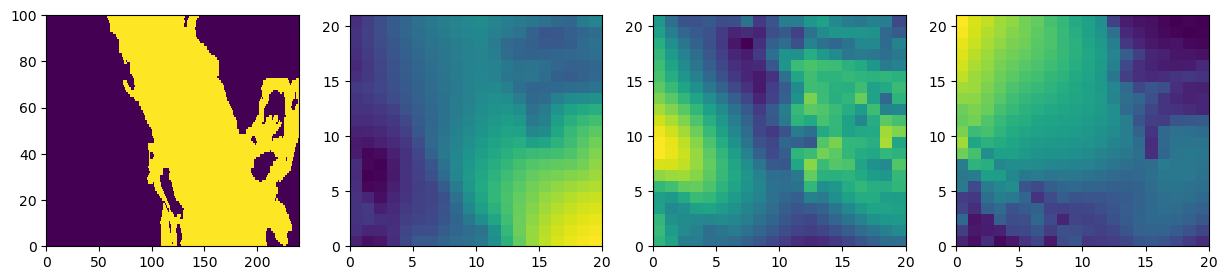

In [28]:
fig,ax=plt.subplots(1,4,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,450:550,110:350])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,119:140,143:163]**2+\
                      g.variables['v_wind'][0,119:140,143:163]**2)**(1/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d21.nc') as g: 
    gl1_lon=g.variables['nav_lon'][:,:]
    gl1_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:140,143:163]**2+\
                      g.variables['v_wind'][0,119:140,143:163]**2)**(1/2))
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d22.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[3].pcolormesh((g.variables['u_wind'][0,119:140,143:163]**2+\
                      g.variables['v_wind'][0,119:140,143:163]**2)**(1/2))
    print(g.variables['u_wind'])

In [29]:
ll_lon=navlon[450,110]
lr_lon=navlon[450,350]
ul_lon=navlon[550,110]
ur_lon=navlon[550,350]
ll_lat=navlat[450,110]
lr_lat=navlat[450,350]
ul_lat=navlat[550,110]
ur_lat=navlat[550,350]

In [31]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

(130, 118) (144, 160) (150, 111) (163, 153)


In [32]:
(ll_j_gl1,ll_i_gl1)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(lr_j_gl1,lr_i_gl1)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl1_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl1,ul_i_gl1)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(ur_j_gl1,ur_i_gl1)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
print((ll_j_gl1,ll_i_gl1),(lr_j_gl1,lr_i_gl1),(ul_j_gl1,ul_i_gl1),(ur_j_gl1,ur_i_gl1))

(123, 117) (141, 157) (142, 111) (156, 150)


In [33]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(127, 121) (141, 160) (146, 114) (159, 153)


In [34]:
# ops: use j: 130:163, i: 111:160
# gl1: use j: 123:156, i: 111:157
# gl2: use j: 127:159, i: 114:160

In [35]:
def getWindVars(day):
    if day>dt.datetime(2014,12,1): #or day.year>2014
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(130,163)
        ilims=(111,160)
    elif day<dt.datetime(2011,9,22):
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(123,156)
        ilims=(111,167)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(127,159)
        ilims=(114,160)
    return opsdir, nam_fmt, jlims,ilims

/tmp/ipykernel_577066/3000062760.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')


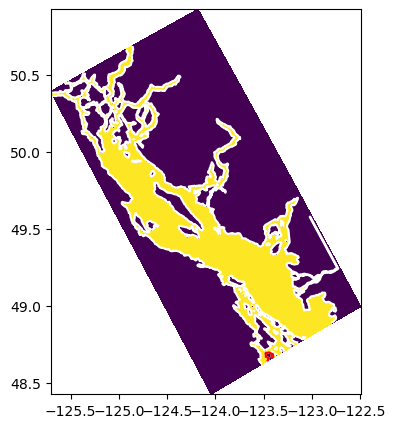

In [36]:
fig,ax=plt.subplots(1,1,figsize=(4,5))
ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')
cl=ax.contour(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],[.5],colors='w')
plt.plot(cl.allsegs[0][0][:,0],cl.allsegs[0][0][:,1],'r-')

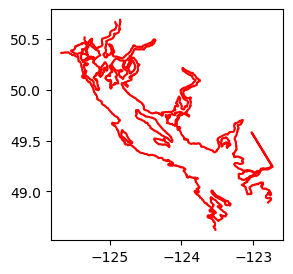

In [37]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
lens=list()
modlines=list()
for ii in range(0,len(cl.allsegs[0])):
    lens.append(len(cl.allsegs[0][ii][:,1]))
    #if np.min(cl.allsegs[0][ii][:,1])<49.2 and np.max(cl.allsegs[0][ii][:,1])>50:
    if len(cl.allsegs[0][ii][:,1])>100:
        #print(ii)
        ax.plot(cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1],'r-')
        modlines.append((cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1]))

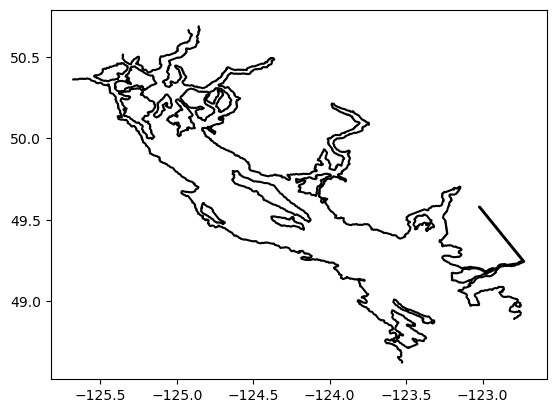

In [38]:
for (lons,lats) in modlines:
    plt.plot(lons,lats,'k-')

In [39]:
opslines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,ops_lon-360,ops_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    opslines.append((x[:,0],x[:,1]))

In [40]:
gl1lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl1_lon-360,gl1_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl1lines.append((x[:,0],x[:,1]))

In [41]:
gl2lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl2_lon-360,gl2_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl2lines.append((x[:,0],x[:,1]))

In [42]:
# extract march mean wind from one of each type of file:
## ops, 2015
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3ops=(fu**2+fv**2)**(1/2) ## use 3/2 to get wind speed cubed
U3opsmean=np.mean(U3ops,0)

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl1=(fu**2+fv**2)**(1/2)
U3gl1mean=np.mean(U3gl1,0)

## gl2, 2012
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
U3gl2=(fu**2+fv**2)**(1/2)
U3gl2mean=np.mean(U3gl2,0)

## Test to make sure the land mask works

In [43]:
year=2008
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,2),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1]))for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
test=(fu**2+fv**2)**(1/2)
testmean=np.mean(test,0)

#
#.where(HRDPS.landmask)

In [44]:
test2008=np.nanmean(testmean)

In [45]:
fu.shape

(24, 33, 56)

In [46]:
fs[0]['u_wind'].shape

(24, 266, 256)

In [47]:
Watermask1.mask.shape

(266, 256)

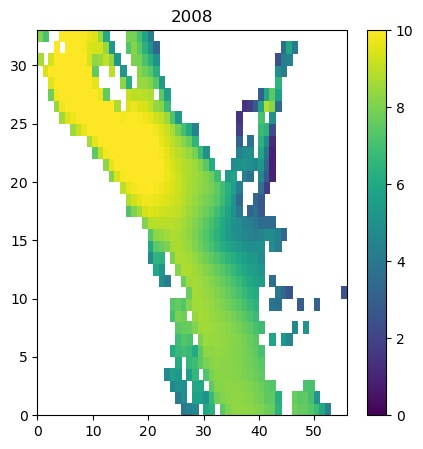

In [48]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
vmin=0
vmax=10

iax=ax
iax.set_title('2008')
m=iax.pcolormesh(testmean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

## January

In [49]:
# extract march mean wind from one of each type of file:

## gl1, 2007
#year=2007
#day=dt.datetime(year,1,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#gl12007=(fu**2+fv**2)**(3/2)
#margl12007mean=np.mean(gl12007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl12008=(fu**2+fv**2)**(1/2)
jan_gl12008mean=np.mean(jan_gl12008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl12009=(fu**2+fv**2)**(1/2)
jan_gl12009mean=np.mean(jan_gl12009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl12010=(fu**2+fv**2)**(1/2)
jan_gl12010mean=np.mean(jan_gl12010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl12011=(fu**2+fv**2)**(1/2)
jan_gl12011mean=np.mean(jan_gl12011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl22012=(fu**2+fv**2)**(1/2)
jan_gl22012mean=np.mean(jan_gl22012,0)

## gl1, 2007
year=2013
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl22013=(fu**2+fv**2)**(1/2)
jan_gl22013mean=np.mean(jan_gl22013,0)

## gl1, 2007
year=2014
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_gl22014=(fu**2+fv**2)**(1/2)
jan_gl22014mean=np.mean(jan_gl22014,0)

## gl1, 2007
year=2015
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2015=(fu**2+fv**2)**(1/2)
jan_ops2015mean=np.mean(jan_ops2015,0)

## ops, 2015
year=2016
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2016=(fu**2+fv**2)**(1/2)
jan_ops2016mean=np.mean(jan_ops2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2017=(fu**2+fv**2)**(1/2)
jan_ops2017mean=np.mean(jan_ops2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2018=(fu**2+fv**2)**(1/2)
jan_ops2018mean=np.mean(jan_ops2018,0)

## gl1, 2007
year=2019
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2019=(fu**2+fv**2)**(1/2)
jan_ops2019mean=np.mean(jan_ops2019,0)

## gl1, 2007
year=2020
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ops2020=(fu**2+fv**2)**(1/2)
jan_ops2020mean=np.mean(jan_ops2020,0)

In [50]:
jan_ops2020mean

<xarray.DataArray (y: 33, x: 49)>
dask.array<mean_agg-aggregate, shape=(33, 49), dtype=float32, chunksize=(33, 49), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 2.775e+05 2.8e+05 2.825e+05 ... 3.95e+05 3.975e+05
  * y        (y) float64 3.25e+05 3.275e+05 3.3e+05 ... 4e+05 4.025e+05 4.05e+05

In [51]:
#Jan2007=np.nanmean(jan_gl12007mean)
Jan2008=np.nanmean(jan_gl12008mean)
Jan2009=np.nanmean(jan_gl12009mean)
Jan2010=np.nanmean(jan_gl12010mean)
Jan2011=np.nanmean(jan_gl12011mean)
Jan2012=np.nanmean(jan_gl22012mean)
Jan2013=np.nanmean(jan_gl22013mean)
Jan2014=np.nanmean(jan_gl22014mean)
Jan2015=np.nanmean(jan_ops2015mean)
Jan2016=np.nanmean(jan_ops2016mean)
Jan2017=np.nanmean(jan_ops2017mean)
Jan2018=np.nanmean(jan_ops2018mean)
Jan2019=np.nanmean(jan_ops2019mean)
Jan2020=np.nanmean(jan_ops2020mean)

Text(0.5, 0.98, 'January Mean Wind Speed')

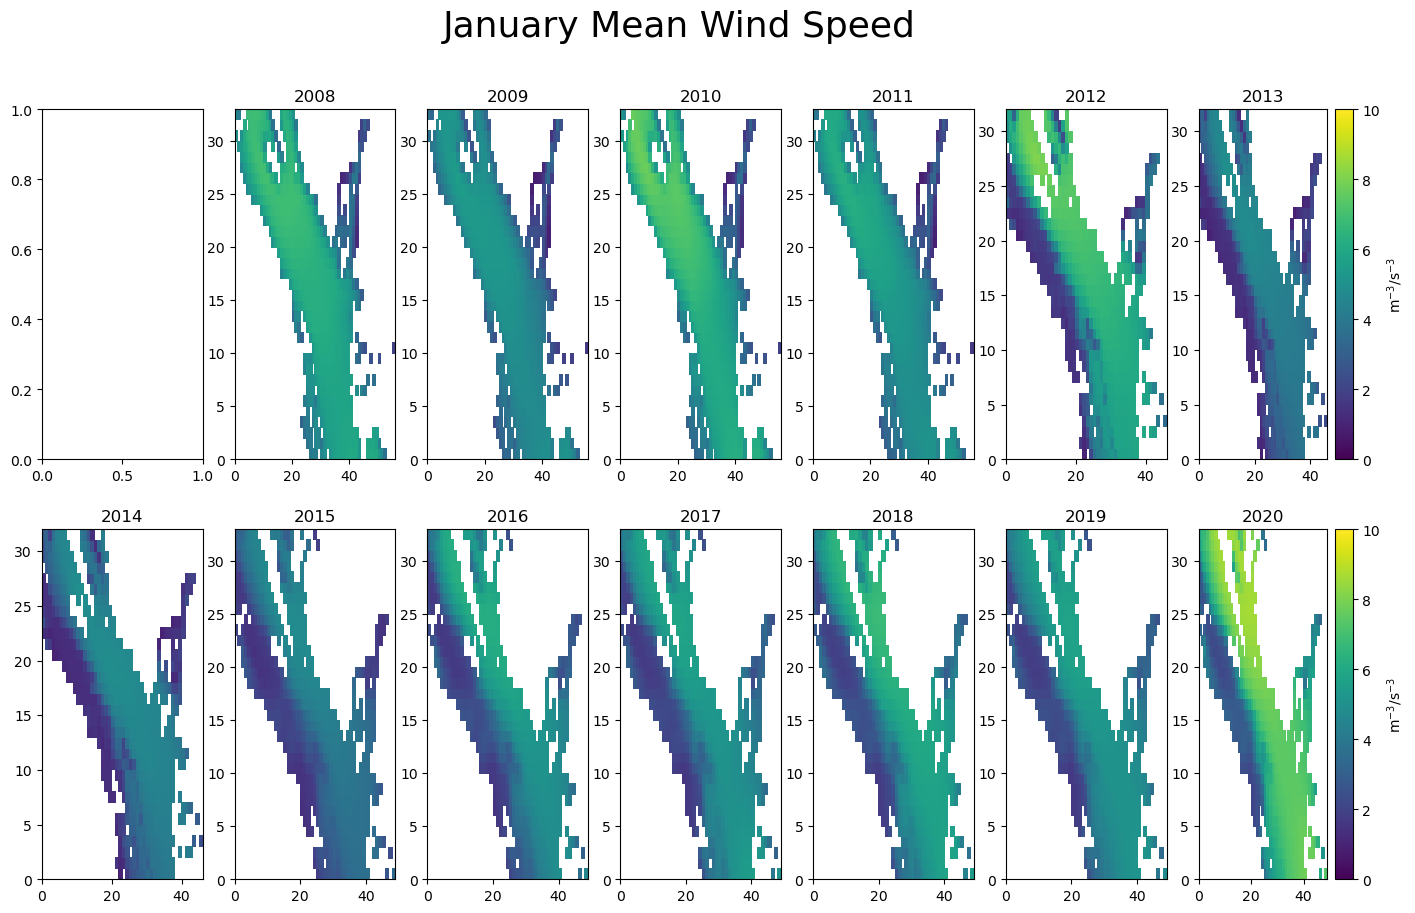

In [52]:
### January winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

#iax=ax[0,0]
#iax.set_title('2007')
#m=iax.pcolormesh(margl12007mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jan_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jan_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jan_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jan_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jan_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jan_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jan_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jan_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jan_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jan_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jan_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jan_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jan_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('January Mean Wind Speed',fontsize=26)

## February

In [53]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12007=(fu**2+fv**2)**(1/2)
feb_gl12007mean=np.mean(feb_gl12007,0)


year=2008
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12008=(fu**2+fv**2)**(1/2)
feb_gl12008mean=np.mean(feb_gl12008,0)


year=2009
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12009=(fu**2+fv**2)**(1/2)
feb_gl12009mean=np.mean(feb_gl12009,0)


year=2010
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12010=(fu**2+fv**2)**(1/2)
feb_gl12010mean=np.mean(feb_gl12010,0)


year=2011
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl12011=(fu**2+fv**2)**(1/2)
feb_gl12011mean=np.mean(feb_gl12011,0)


year=2012
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22012=(fu**2+fv**2)**(1/2)
feb_gl22012mean=np.mean(feb_gl22012,0)


year=2013
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22013=(fu**2+fv**2)**(1/2)
feb_gl22013mean=np.mean(feb_gl22013,0)


year=2014
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_gl22014=(fu**2+fv**2)**(1/2)
feb_gl22014mean=np.mean(feb_gl22014,0)


year=2015
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2015=(fu**2+fv**2)**(1/2)
feb_ops2015mean=np.mean(feb_ops2015,0)


year=2016
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2016=(fu**2+fv**2)**(1/2)
feb_ops2016mean=np.mean(feb_ops2016,0)


year=2017
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2017=(fu**2+fv**2)**(1/2)
feb_ops2017mean=np.mean(feb_ops2017,0)


year=2018
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2018=(fu**2+fv**2)**(1/2)
feb_ops2018mean=np.mean(feb_ops2018,0)


year=2019
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2019=(fu**2+fv**2)**(1/2)
feb_ops2019mean=np.mean(feb_ops2019,0)


year=2020
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_ops2020=(fu**2+fv**2)**(1/2)
feb_ops2020mean=np.mean(feb_ops2020,0)

In [54]:
Feb2007=np.nanmean(feb_gl12007mean)
Feb2008=np.nanmean(feb_gl12008mean)
Feb2009=np.nanmean(feb_gl12009mean)
Feb2010=np.nanmean(feb_gl12010mean)
Feb2011=np.nanmean(feb_gl12011mean)
Feb2012=np.nanmean(feb_gl22012mean)
Feb2013=np.nanmean(feb_gl22013mean)
Feb2014=np.nanmean(feb_gl22014mean)
Feb2015=np.nanmean(feb_ops2015mean)
Feb2016=np.nanmean(feb_ops2016mean)
Feb2017=np.nanmean(feb_ops2017mean)
Feb2018=np.nanmean(feb_ops2018mean)
Feb2019=np.nanmean(feb_ops2019mean)
Feb2020=np.nanmean(feb_ops2020mean)

In [55]:
print(Feb2007, Feb2008,Feb2009,Feb2010,Feb2011,Feb2012,Feb2013,Feb2014,Feb2015,Feb2016,Feb2017,Feb2018,Feb2019,Feb2020)

4.87161 4.4020443 4.1070614 4.83691 5.5196977 4.568885 3.9330392 4.1628203 3.330552 3.7370775 3.9666786 3.5797174 4.13506 3.867792


Text(0.5, 0.98, 'February Mean Wind Speed')

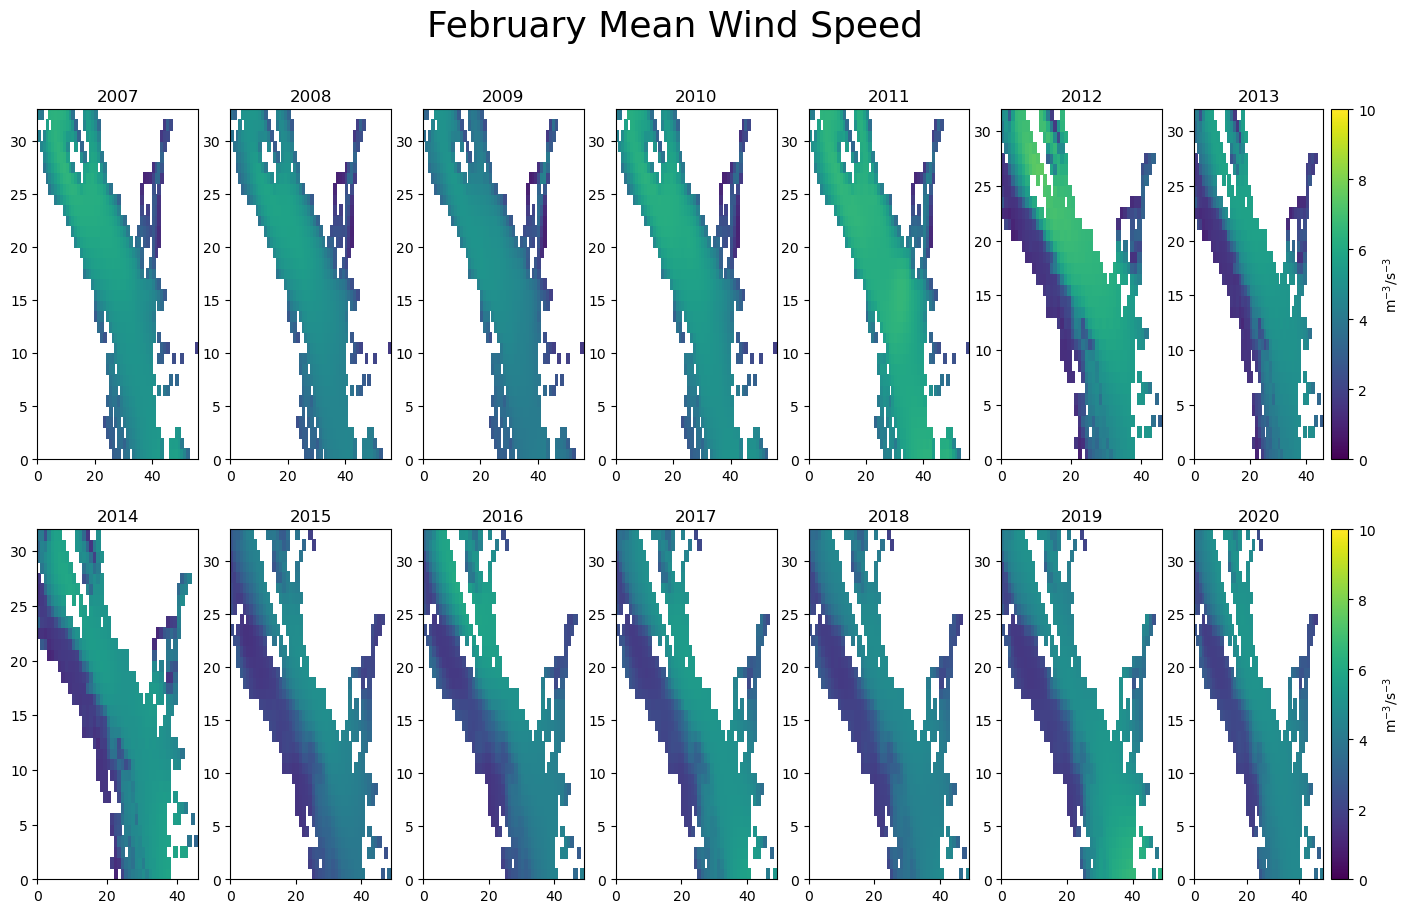

In [56]:
### February winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(feb_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(feb_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(feb_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(feb_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(feb_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(feb_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(feb_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(feb_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(feb_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(feb_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(feb_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(feb_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(feb_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(feb_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('February Mean Wind Speed',fontsize=26)

## March

In [57]:
# extract march mean wind from one of each type of file:

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12007=(fu**2+fv**2)**(1/2)
mar_gl12007mean=np.mean(mar_gl12007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12008=(fu**2+fv**2)**(1/2)
mar_gl12008mean=np.mean(mar_gl12008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12009=(fu**2+fv**2)**(1/2)
mar_gl12009mean=np.mean(mar_gl12009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12010=(fu**2+fv**2)**(1/2)
mar_gl12010mean=np.mean(mar_gl12010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl12011=(fu**2+fv**2)**(1/2)
mar_gl12011mean=np.mean(mar_gl12011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl22012=(fu**2+fv**2)**(1/2)
mar_gl22012mean=np.mean(mar_gl22012,0)

## gl1, 2007
year=2013
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl22013=(fu**2+fv**2)**(1/2)
mar_gl22013mean=np.mean(mar_gl22013,0)

## gl1, 2007
year=2014
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_gl22014=(fu**2+fv**2)**(1/2)
mar_gl22014mean=np.mean(mar_gl22014,0)

## gl1, 2007
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2015=(fu**2+fv**2)**(1/2)
mar_ops2015mean=np.mean(mar_ops2015,0)

## ops, 2015
year=2016
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2016=(fu**2+fv**2)**(1/2)
mar_ops2016mean=np.mean(mar_ops2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2017=(fu**2+fv**2)**(1/2)
mar_ops2017mean=np.mean(mar_ops2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2018=(fu**2+fv**2)**(1/2)
mar_ops2018mean=np.mean(mar_ops2018,0)

## gl1, 2007
year=2019
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2019=(fu**2+fv**2)**(1/2)
mar_ops2019mean=np.mean(mar_ops2019,0)

## gl1, 2007
year=2020
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_ops2020=(fu**2+fv**2)**(1/2)
mar_ops2020mean=np.mean(mar_ops2020,0)


In [58]:
Mar2007=np.nanmean(mar_gl12007mean)
Mar2008=np.nanmean(mar_gl12008mean)
Mar2009=np.nanmean(mar_gl12009mean)
Mar2010=np.nanmean(mar_gl12010mean)
Mar2011=np.nanmean(mar_gl12011mean)
Mar2012=np.nanmean(mar_gl22012mean)
Mar2013=np.nanmean(mar_gl22013mean)
Mar2014=np.nanmean(mar_gl22014mean)
Mar2015=np.nanmean(mar_ops2015mean)
Mar2016=np.nanmean(mar_ops2016mean)
Mar2017=np.nanmean(mar_ops2017mean)
Mar2018=np.nanmean(mar_ops2018mean)
Mar2019=np.nanmean(mar_ops2019mean)
Mar2020=np.nanmean(mar_ops2020mean)

Text(0.5, 0.98, 'March Mean Wind Speed')

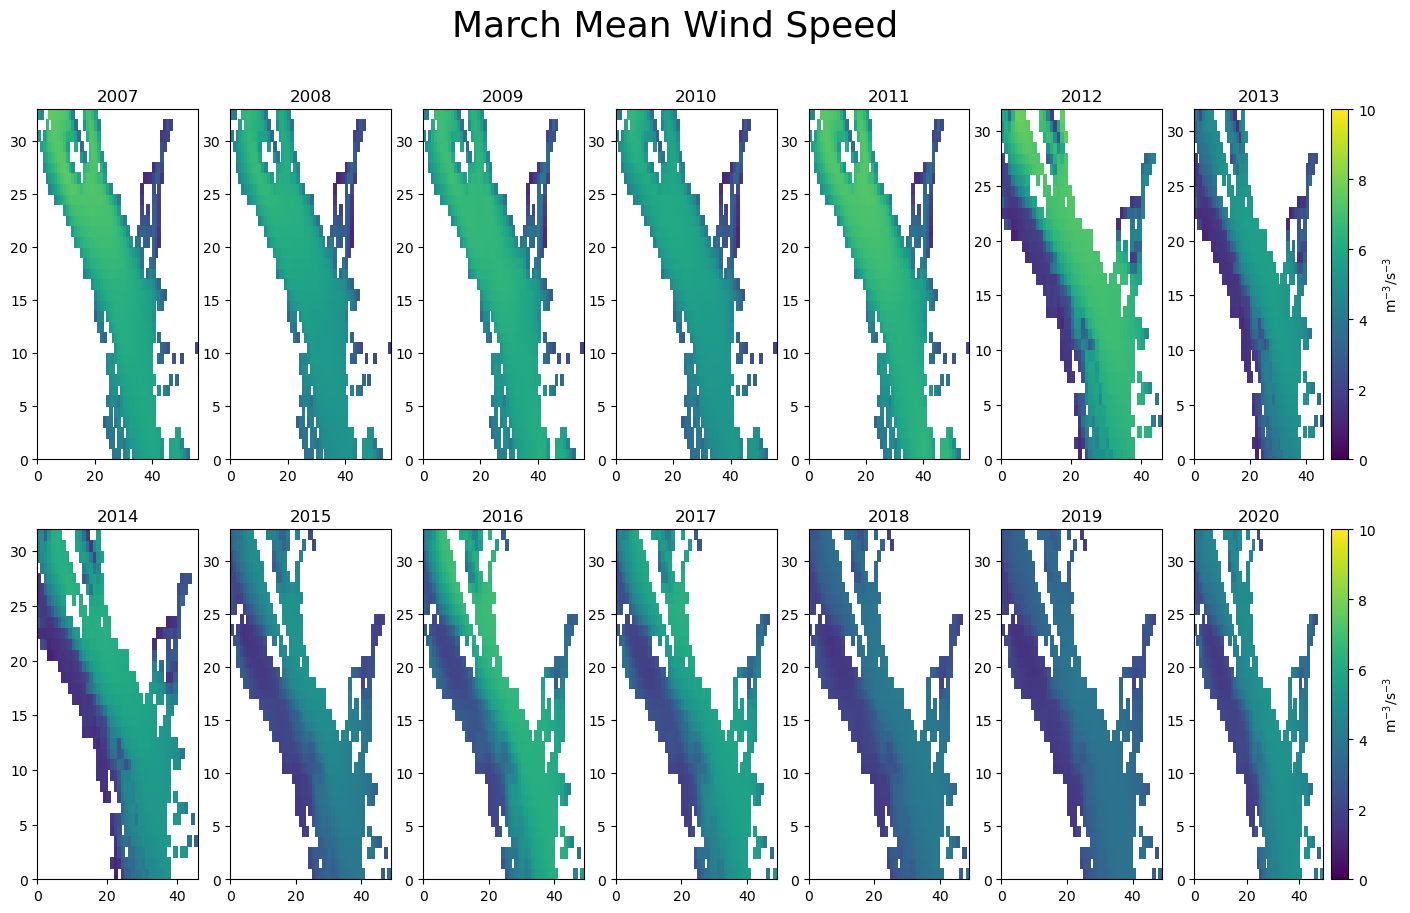

In [59]:
### March winds
fig,ax=plt.subplots(2,7,figsize=(17,10))

vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(mar_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(mar_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(mar_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(mar_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(mar_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(mar_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(mar_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(mar_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(mar_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(mar_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(mar_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(mar_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(mar_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(mar_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('March Mean Wind Speed',fontsize=26)

## April

In [60]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12007=(fu**2+fv**2)**(1/2)
apr_gl12007mean=np.mean(apr_gl12007,0)


year=2008
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12008=(fu**2+fv**2)**(1/2)
apr_gl12008mean=np.mean(apr_gl12008,0)


year=2009
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12009=(fu**2+fv**2)**(1/2)
apr_gl12009mean=np.mean(apr_gl12009,0)


year=2010
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12010=(fu**2+fv**2)**(1/2)
apr_gl12010mean=np.mean(apr_gl12010,0)


year=2011
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl12011=(fu**2+fv**2)**(1/2)
apr_gl12011mean=np.mean(apr_gl12011,0)


year=2012
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl22012=(fu**2+fv**2)**(1/2)
apr_gl22012mean=np.mean(apr_gl22012,0)


year=2013
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl22013=(fu**2+fv**2)**(1/2)
apr_gl22013mean=np.mean(apr_gl22013,0)


year=2014
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_gl22014=(fu**2+fv**2)**(1/2)
apr_gl22014mean=np.mean(apr_gl22014,0)


year=2015
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2015=(fu**2+fv**2)**(1/2)
apr_ops2015mean=np.mean(apr_ops2015,0)


year=2016
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2016=(fu**2+fv**2)**(1/2)
apr_ops2016mean=np.mean(apr_ops2016,0)


year=2017
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2017=(fu**2+fv**2)**(1/2)
apr_ops2017mean=np.mean(apr_ops2017,0)


year=2018
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2018=(fu**2+fv**2)**(1/2)
apr_ops2018mean=np.mean(apr_ops2018,0)


year=2019
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2019=(fu**2+fv**2)**(1/2)
apr_ops2019mean=np.mean(apr_ops2019,0)


year=2020
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_ops2020=(fu**2+fv**2)**(1/2)
apr_ops2020mean=np.mean(apr_ops2020,0)

Text(0.5, 0.98, 'April Mean Wind Speed')

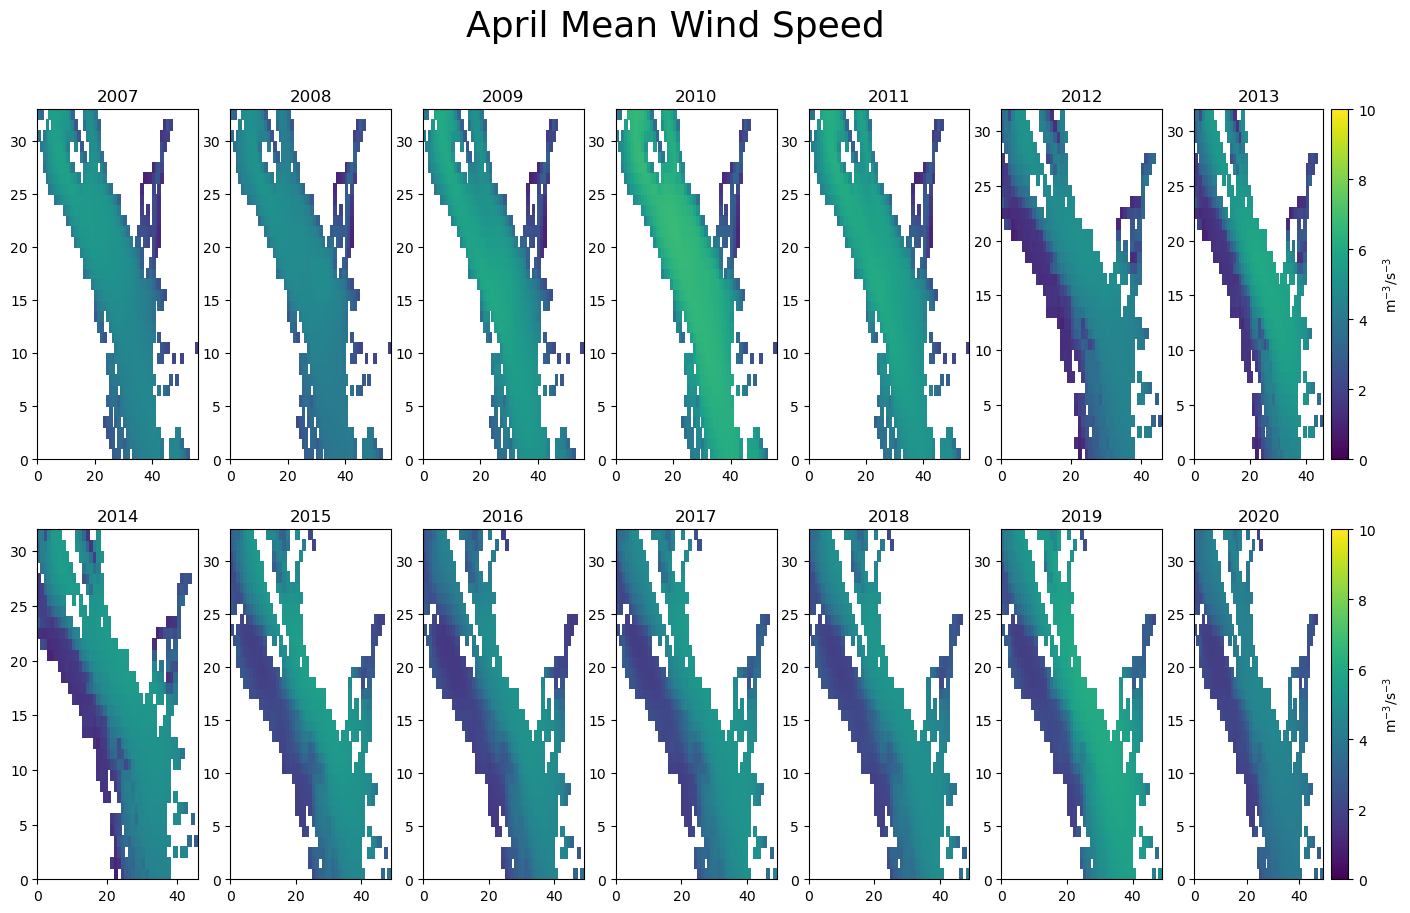

In [61]:
### April winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(apr_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(apr_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(apr_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(apr_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(apr_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(apr_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(apr_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(apr_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(apr_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(apr_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(apr_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(apr_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(apr_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(apr_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('April Mean Wind Speed',fontsize=26)

In [62]:
Apr2007=np.nanmean(apr_gl12007mean)
Apr2008=np.nanmean(apr_gl12008mean)
Apr2009=np.nanmean(apr_gl12009mean)
Apr2010=np.nanmean(apr_gl12010mean)
Apr2011=np.nanmean(apr_gl12011mean)
Apr2012=np.nanmean(apr_gl22012mean)
Apr2013=np.nanmean(apr_gl22013mean)
Apr2014=np.nanmean(apr_gl22014mean)
Apr2015=np.nanmean(apr_ops2015mean)
Apr2016=np.nanmean(apr_ops2016mean)
Apr2017=np.nanmean(apr_ops2017mean)
Apr2018=np.nanmean(apr_ops2018mean)
Apr2019=np.nanmean(apr_ops2019mean)
Apr2020=np.nanmean(apr_ops2020mean)

## May

In [63]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12007=(fu**2+fv**2)**(1/2)
may_gl12007mean=np.mean(may_gl12007,0)


year=2008
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12008=(fu**2+fv**2)**(1/2)
may_gl12008mean=np.mean(may_gl12008,0)


year=2009
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12009=(fu**2+fv**2)**(1/2)
may_gl12009mean=np.mean(may_gl12009,0)


year=2010
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12010=(fu**2+fv**2)**(1/2)
may_gl12010mean=np.mean(may_gl12010,0)


year=2011
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl12011=(fu**2+fv**2)**(1/2)
may_gl12011mean=np.mean(may_gl12011,0)


year=2012
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl22012=(fu**2+fv**2)**(1/2)
may_gl22012mean=np.mean(may_gl22012,0)


year=2013
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl22013=(fu**2+fv**2)**(1/2)
may_gl22013mean=np.mean(may_gl22013,0)


year=2014
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_gl22014=(fu**2+fv**2)**(1/2)
may_gl22014mean=np.mean(may_gl22014,0)


year=2015
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2015=(fu**2+fv**2)**(1/2)
may_ops2015mean=np.mean(may_ops2015,0)


year=2016
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2016=(fu**2+fv**2)**(1/2)
may_ops2016mean=np.mean(may_ops2016,0)


year=2017
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2017=(fu**2+fv**2)**(1/2)
may_ops2017mean=np.mean(may_ops2017,0)


year=2018
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2018=(fu**2+fv**2)**(1/2)
may_ops2018mean=np.mean(may_ops2018,0)


year=2019
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2019=(fu**2+fv**2)**(1/2)
may_ops2019mean=np.mean(may_ops2019,0)


year=2020
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_ops2020=(fu**2+fv**2)**(1/2)
may_ops2020mean=np.mean(may_ops2020,0)

Text(0.5, 0.98, 'May Mean Wind Speed')

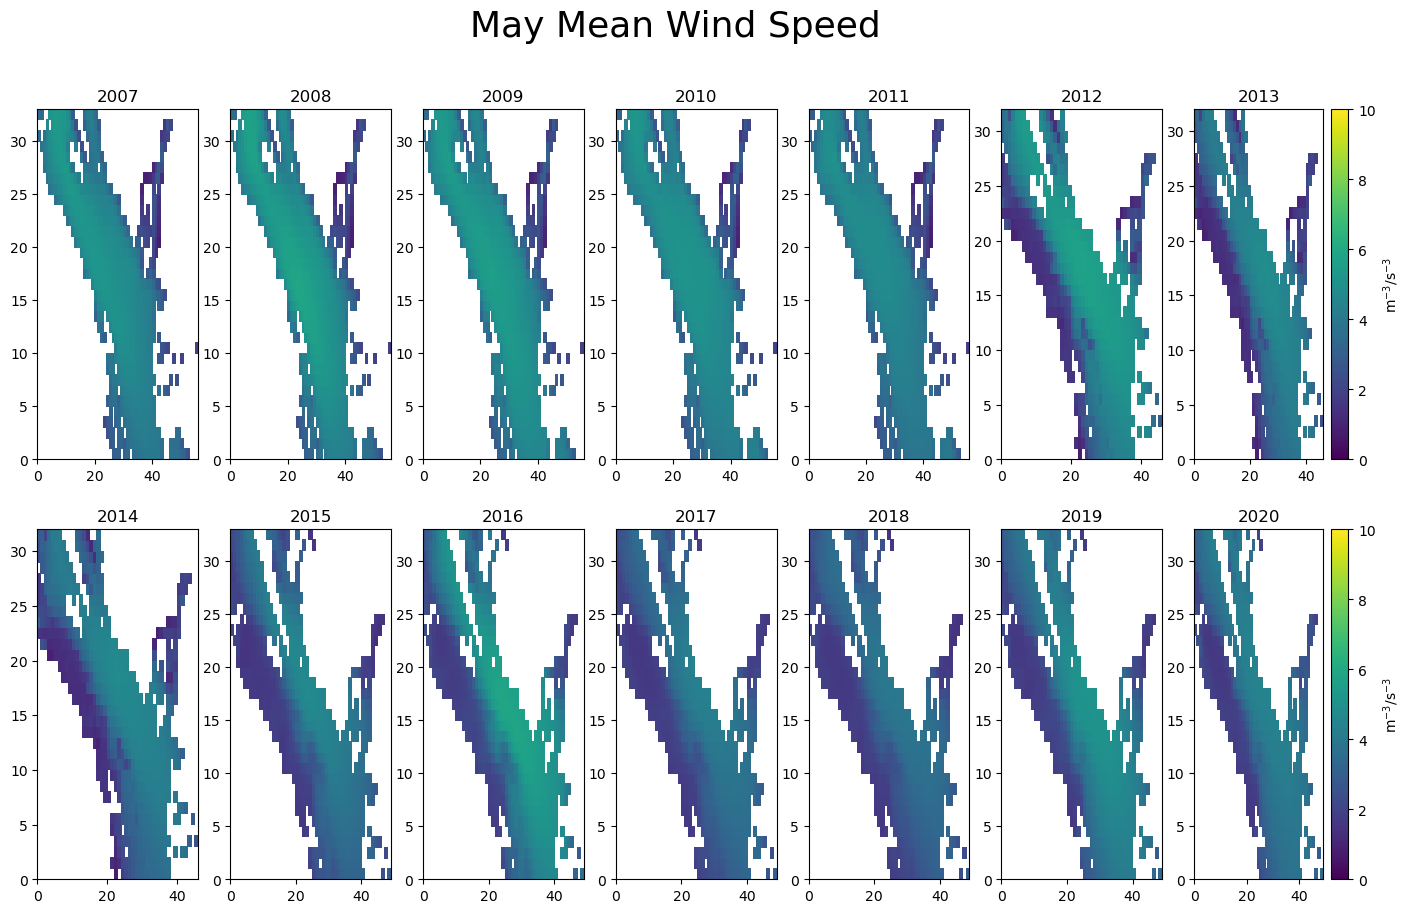

In [64]:
### May winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(may_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(may_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(may_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(may_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(may_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(may_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(may_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(may_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(may_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(may_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(may_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(may_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(may_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(may_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('May Mean Wind Speed',fontsize=26)

In [65]:
May2007=np.nanmean(may_gl12007mean)
May2008=np.nanmean(may_gl12008mean)
May2009=np.nanmean(may_gl12009mean)
May2010=np.nanmean(may_gl12010mean)
May2011=np.nanmean(may_gl12011mean)
May2012=np.nanmean(may_gl22012mean)
May2013=np.nanmean(may_gl22013mean)
May2014=np.nanmean(may_gl22014mean)
May2015=np.nanmean(may_ops2015mean)
May2016=np.nanmean(may_ops2016mean)
May2017=np.nanmean(may_ops2017mean)
May2018=np.nanmean(may_ops2018mean)
May2019=np.nanmean(may_ops2019mean)
May2020=np.nanmean(may_ops2020mean)

## June

In [66]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12007=(fu**2+fv**2)**(1/2)
jun_gl12007mean=np.mean(jun_gl12007,0)


year=2008
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12008=(fu**2+fv**2)**(1/2)
jun_gl12008mean=np.mean(jun_gl12008,0)


year=2009
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12009=(fu**2+fv**2)**(1/2)
jun_gl12009mean=np.mean(jun_gl12009,0)


year=2010
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12010=(fu**2+fv**2)**(1/2)
jun_gl12010mean=np.mean(jun_gl12010,0)


year=2011
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl12011=(fu**2+fv**2)**(1/2)
jun_gl12011mean=np.mean(jun_gl12011,0)


year=2012
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl22012=(fu**2+fv**2)**(1/2)
jun_gl22012mean=np.mean(jun_gl22012,0)


year=2013
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl22013=(fu**2+fv**2)**(1/2)
jun_gl22013mean=np.mean(jun_gl22013,0)


year=2014
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_gl22014=(fu**2+fv**2)**(1/2)
jun_gl22014mean=np.mean(jun_gl22014,0)


year=2015
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2015=(fu**2+fv**2)**(1/2)
jun_ops2015mean=np.mean(jun_ops2015,0)


year=2016
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2016=(fu**2+fv**2)**(1/2)
jun_ops2016mean=np.mean(jun_ops2016,0)


year=2017
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2017=(fu**2+fv**2)**(1/2)
jun_ops2017mean=np.mean(jun_ops2017,0)


year=2018
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2018=(fu**2+fv**2)**(1/2)
jun_ops2018mean=np.mean(jun_ops2018,0)


year=2019
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2019=(fu**2+fv**2)**(1/2)
jun_ops2019mean=np.mean(jun_ops2019,0)


year=2020
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_ops2020=(fu**2+fv**2)**(1/2)
jun_ops2020mean=np.mean(jun_ops2020,0)

Text(0.5, 0.98, 'June Mean Wind Speed')

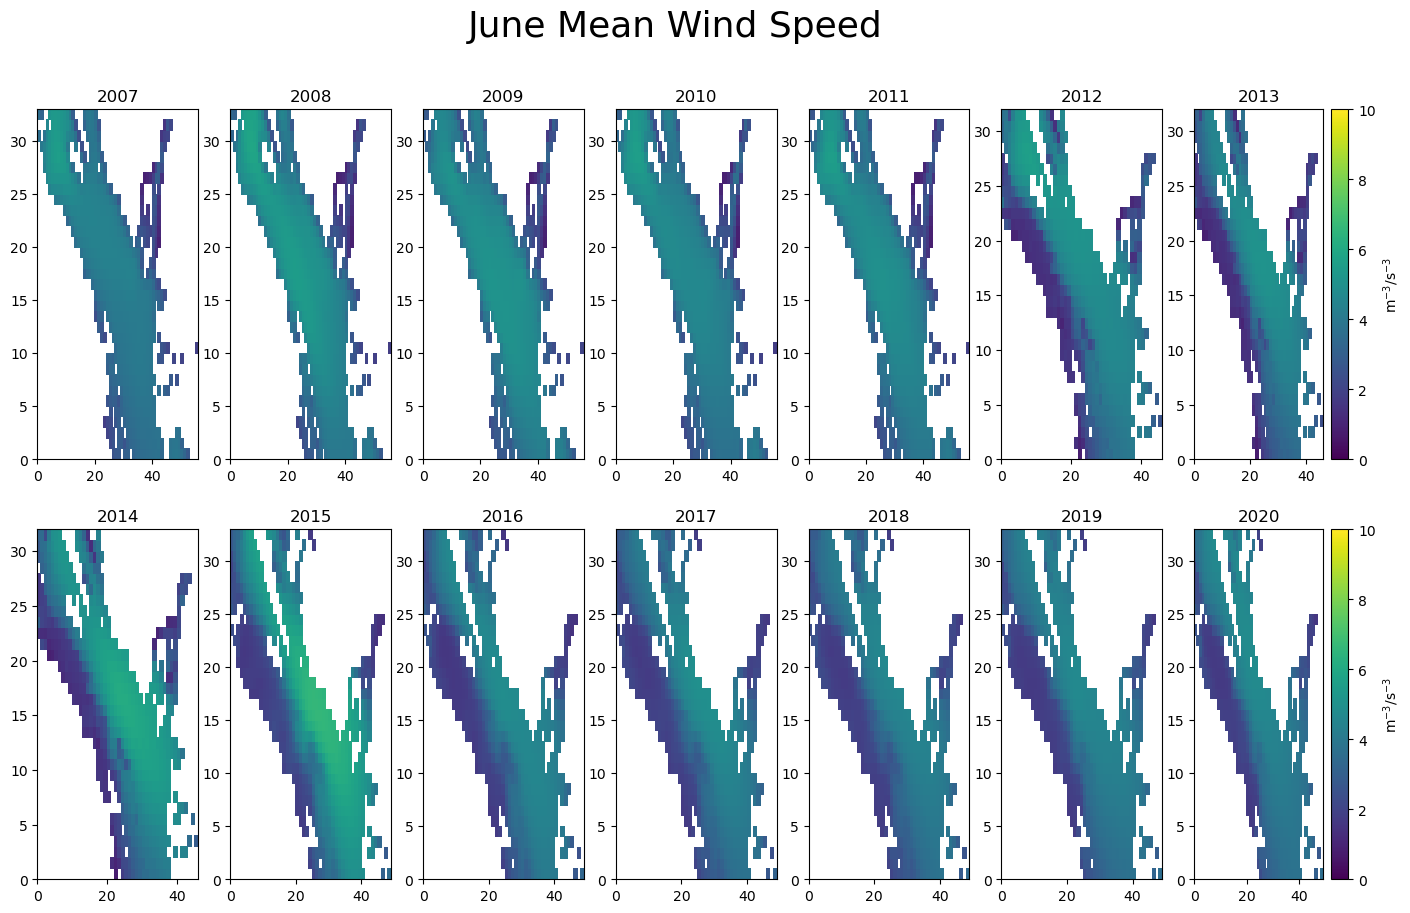

In [67]:
### June winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jun_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jun_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jun_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jun_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jun_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jun_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jun_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jun_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jun_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jun_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jun_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jun_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jun_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jun_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('June Mean Wind Speed',fontsize=26)

In [68]:
Jun2007=np.nanmean(jun_gl12007mean)
Jun2008=np.nanmean(jun_gl12008mean)
Jun2009=np.nanmean(jun_gl12009mean)
Jun2010=np.nanmean(jun_gl12010mean)
Jun2011=np.nanmean(jun_gl12011mean)
Jun2012=np.nanmean(jun_gl22012mean)
Jun2013=np.nanmean(jun_gl22013mean)
Jun2014=np.nanmean(jun_gl22014mean)
Jun2015=np.nanmean(jun_ops2015mean)
Jun2016=np.nanmean(jun_ops2016mean)
Jun2017=np.nanmean(jun_ops2017mean)
Jun2018=np.nanmean(jun_ops2018mean)
Jun2019=np.nanmean(jun_ops2019mean)
Jun2020=np.nanmean(jun_ops2020mean)

## July

In [69]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12007=(fu**2+fv**2)**(1/2)
jul_gl12007mean=np.mean(jul_gl12007,0)


year=2008
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12008=(fu**2+fv**2)**(1/2)
jul_gl12008mean=np.mean(jul_gl12008,0)


year=2009
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12009=(fu**2+fv**2)**(1/2)
jul_gl12009mean=np.mean(jul_gl12009,0)


year=2010
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12010=(fu**2+fv**2)**(1/2)
jul_gl12010mean=np.mean(jul_gl12010,0)


year=2011
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl12011=(fu**2+fv**2)**(1/2)
jul_gl12011mean=np.mean(jul_gl12011,0)


year=2012
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl22012=(fu**2+fv**2)**(1/2)
jul_gl22012mean=np.mean(jul_gl22012,0)


year=2013
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl22013=(fu**2+fv**2)**(1/2)
jul_gl22013mean=np.mean(jul_gl22013,0)


year=2014
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_gl22014=(fu**2+fv**2)**(1/2)
jul_gl22014mean=np.mean(jul_gl22014,0)


year=2015
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2015=(fu**2+fv**2)**(1/2)
jul_ops2015mean=np.mean(jul_ops2015,0)


year=2016
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2016=(fu**2+fv**2)**(1/2)
jul_ops2016mean=np.mean(jul_ops2016,0)


year=2017
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2017=(fu**2+fv**2)**(1/2)
jul_ops2017mean=np.mean(jul_ops2017,0)


year=2018
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2018=(fu**2+fv**2)**(1/2)
jul_ops2018mean=np.mean(jul_ops2018,0)


year=2019
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2019=(fu**2+fv**2)**(1/2)
jul_ops2019mean=np.mean(jul_ops2019,0)


year=2020
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_ops2020=(fu**2+fv**2)**(1/2)
jul_ops2020mean=np.mean(jul_ops2020,0)

Text(0.5, 0.98, 'July Mean Wind Speed')

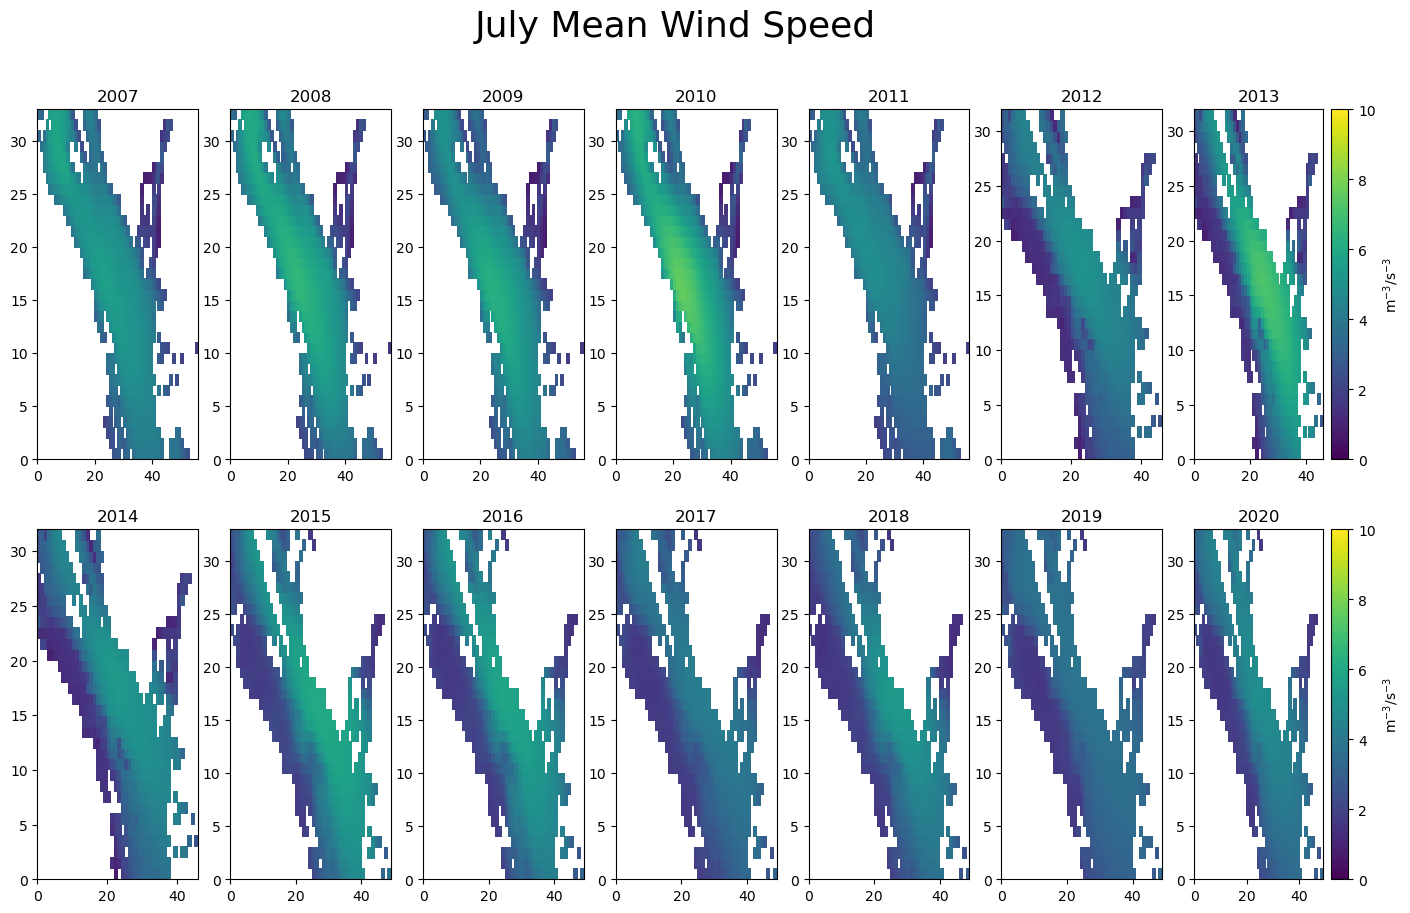

In [70]:
### July winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jul_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jul_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jul_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jul_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jul_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jul_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jul_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jul_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jul_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jul_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jul_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jul_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jul_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jul_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('July Mean Wind Speed',fontsize=26)

In [71]:
Jul2007=np.nanmean(jul_gl12007mean)
Jul2008=np.nanmean(jul_gl12008mean)
Jul2009=np.nanmean(jul_gl12009mean)
Jul2010=np.nanmean(jul_gl12010mean)
Jul2011=np.nanmean(jul_gl12011mean)
Jul2012=np.nanmean(jul_gl22012mean)
Jul2013=np.nanmean(jul_gl22013mean)
Jul2014=np.nanmean(jul_gl22014mean)
Jul2015=np.nanmean(jul_ops2015mean)
Jul2016=np.nanmean(jul_ops2016mean)
Jul2017=np.nanmean(jul_ops2017mean)
Jul2018=np.nanmean(jul_ops2018mean)
Jul2019=np.nanmean(jul_ops2019mean)
Jul2020=np.nanmean(jul_ops2020mean)

## August

In [72]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12007=(fu**2+fv**2)**(1/2)
aug_gl12007mean=np.mean(aug_gl12007,0)


year=2008
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12008=(fu**2+fv**2)**(1/2)
aug_gl12008mean=np.mean(aug_gl12008,0)


year=2009
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12009=(fu**2+fv**2)**(1/2)
aug_gl12009mean=np.mean(aug_gl12009,0)


year=2010
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12010=(fu**2+fv**2)**(1/2)
aug_gl12010mean=np.mean(aug_gl12010,0)


year=2011
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl12011=(fu**2+fv**2)**(1/2)
aug_gl12011mean=np.mean(aug_gl12011,0)


year=2012
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl22012=(fu**2+fv**2)**(1/2)
aug_gl22012mean=np.mean(aug_gl22012,0)


year=2013
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl22013=(fu**2+fv**2)**(1/2)
aug_gl22013mean=np.mean(aug_gl22013,0)


year=2014
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_gl22014=(fu**2+fv**2)**(1/2)
aug_gl22014mean=np.mean(aug_gl22014,0)


year=2015
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2015=(fu**2+fv**2)**(1/2)
aug_ops2015mean=np.mean(aug_ops2015,0)


year=2016
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2016=(fu**2+fv**2)**(1/2)
aug_ops2016mean=np.mean(aug_ops2016,0)


year=2017
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2017=(fu**2+fv**2)**(1/2)
aug_ops2017mean=np.mean(aug_ops2017,0)


year=2018
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2018=(fu**2+fv**2)**(1/2)
aug_ops2018mean=np.mean(aug_ops2018,0)


year=2019
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2019=(fu**2+fv**2)**(1/2)
aug_ops2019mean=np.mean(aug_ops2019,0)


year=2020
day=dt.datetime(year,8,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,8,1),dt.datetime(year,8,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
aug_ops2020=(fu**2+fv**2)**(1/2)
aug_ops2020mean=np.mean(aug_ops2020,0)

Text(0.5, 0.98, 'August Mean Wind Speed')

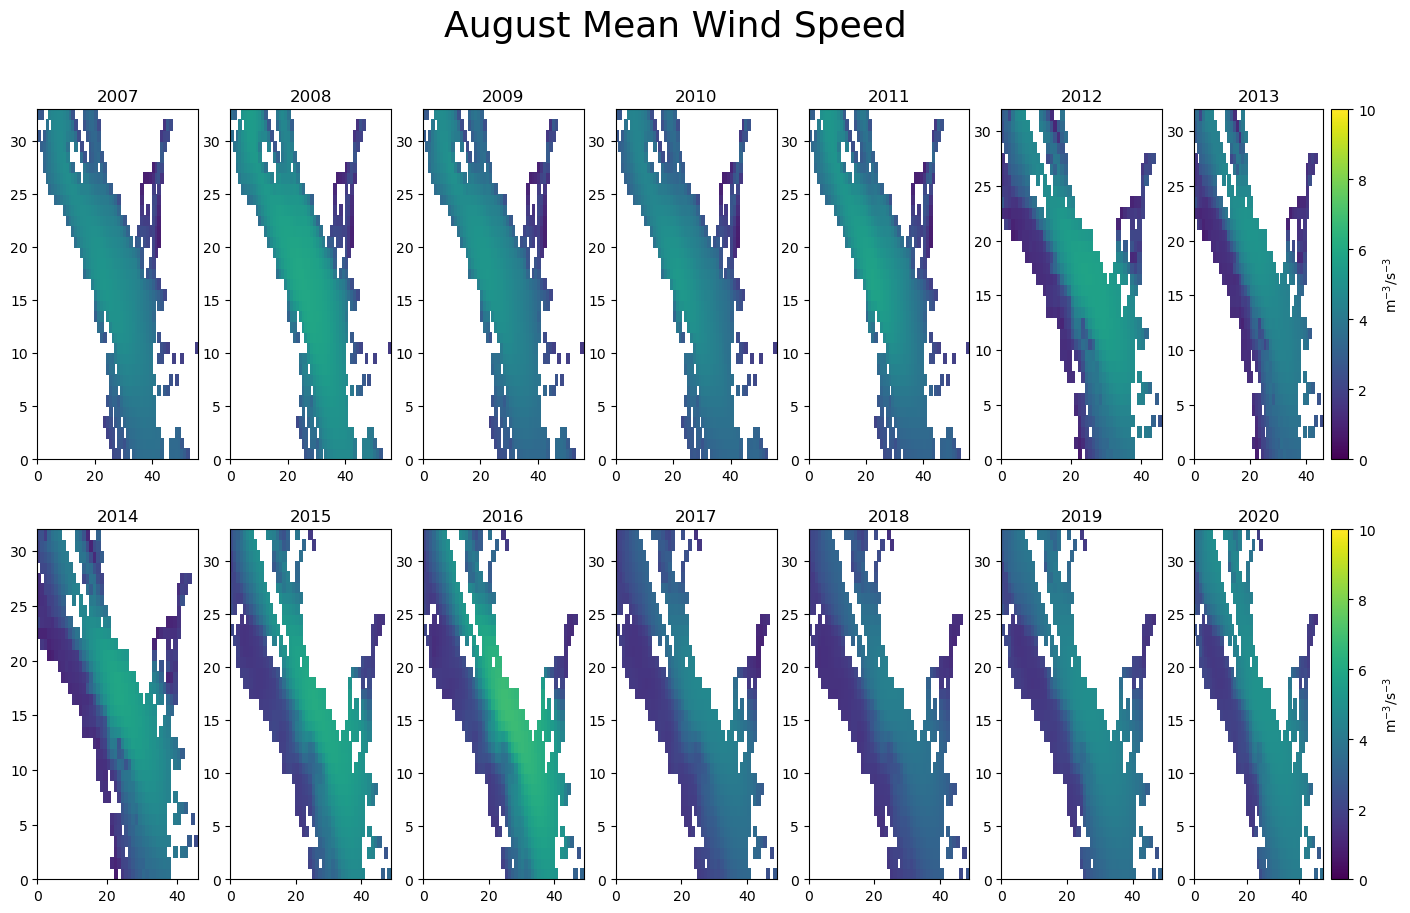

In [73]:
### August winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(aug_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(aug_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(aug_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(aug_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(aug_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(aug_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(aug_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(aug_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(aug_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(aug_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(aug_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(aug_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(aug_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(aug_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('August Mean Wind Speed',fontsize=26)

In [74]:
Aug2007=np.nanmean(aug_gl12007mean)
Aug2008=np.nanmean(aug_gl12008mean)
Aug2009=np.nanmean(aug_gl12009mean)
Aug2010=np.nanmean(aug_gl12010mean)
Aug2011=np.nanmean(aug_gl12011mean)
Aug2012=np.nanmean(aug_gl22012mean)
Aug2013=np.nanmean(aug_gl22013mean)
Aug2014=np.nanmean(aug_gl22014mean)
Aug2015=np.nanmean(aug_ops2015mean)
Aug2016=np.nanmean(aug_ops2016mean)
Aug2017=np.nanmean(aug_ops2017mean)
Aug2018=np.nanmean(aug_ops2018mean)
Aug2019=np.nanmean(aug_ops2019mean)
Aug2020=np.nanmean(aug_ops2020mean)

## September

In [75]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12007=(fu**2+fv**2)**(1/2)
sep_gl12007mean=np.mean(sep_gl12007,0)


year=2008
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12008=(fu**2+fv**2)**(1/2)
sep_gl12008mean=np.mean(sep_gl12008,0)


year=2009
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12009=(fu**2+fv**2)**(1/2)
sep_gl12009mean=np.mean(sep_gl12009,0)


year=2010
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12010=(fu**2+fv**2)**(1/2)
sep_gl12010mean=np.mean(sep_gl12010,0)


year=2011
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl12011=(fu**2+fv**2)**(1/2)
sep_gl12011mean=np.mean(sep_gl12011,0)


year=2012
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl22012=(fu**2+fv**2)**(1/2)
sep_gl22012mean=np.mean(sep_gl22012,0)


year=2013
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl22013=(fu**2+fv**2)**(1/2)
sep_gl22013mean=np.mean(sep_gl22013,0)


year=2014
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_gl22014=(fu**2+fv**2)**(1/2)
sep_gl22014mean=np.mean(sep_gl22014,0)


year=2015
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2015=(fu**2+fv**2)**(1/2)
sep_ops2015mean=np.mean(sep_ops2015,0)


year=2016
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2016=(fu**2+fv**2)**(1/2)
sep_ops2016mean=np.mean(sep_ops2016,0)


year=2017
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2017=(fu**2+fv**2)**(1/2)
sep_ops2017mean=np.mean(sep_ops2017,0)


year=2018
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2018=(fu**2+fv**2)**(1/2)
sep_ops2018mean=np.mean(sep_ops2018,0)


year=2019
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2019=(fu**2+fv**2)**(1/2)
sep_ops2019mean=np.mean(sep_ops2019,0)


year=2020
day=dt.datetime(year,9,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,9,1),dt.datetime(year,9,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
sep_ops2020=(fu**2+fv**2)**(1/2)
sep_ops2020mean=np.mean(sep_ops2020,0)

Text(0.5, 0.98, 'September Mean Wind Speed')

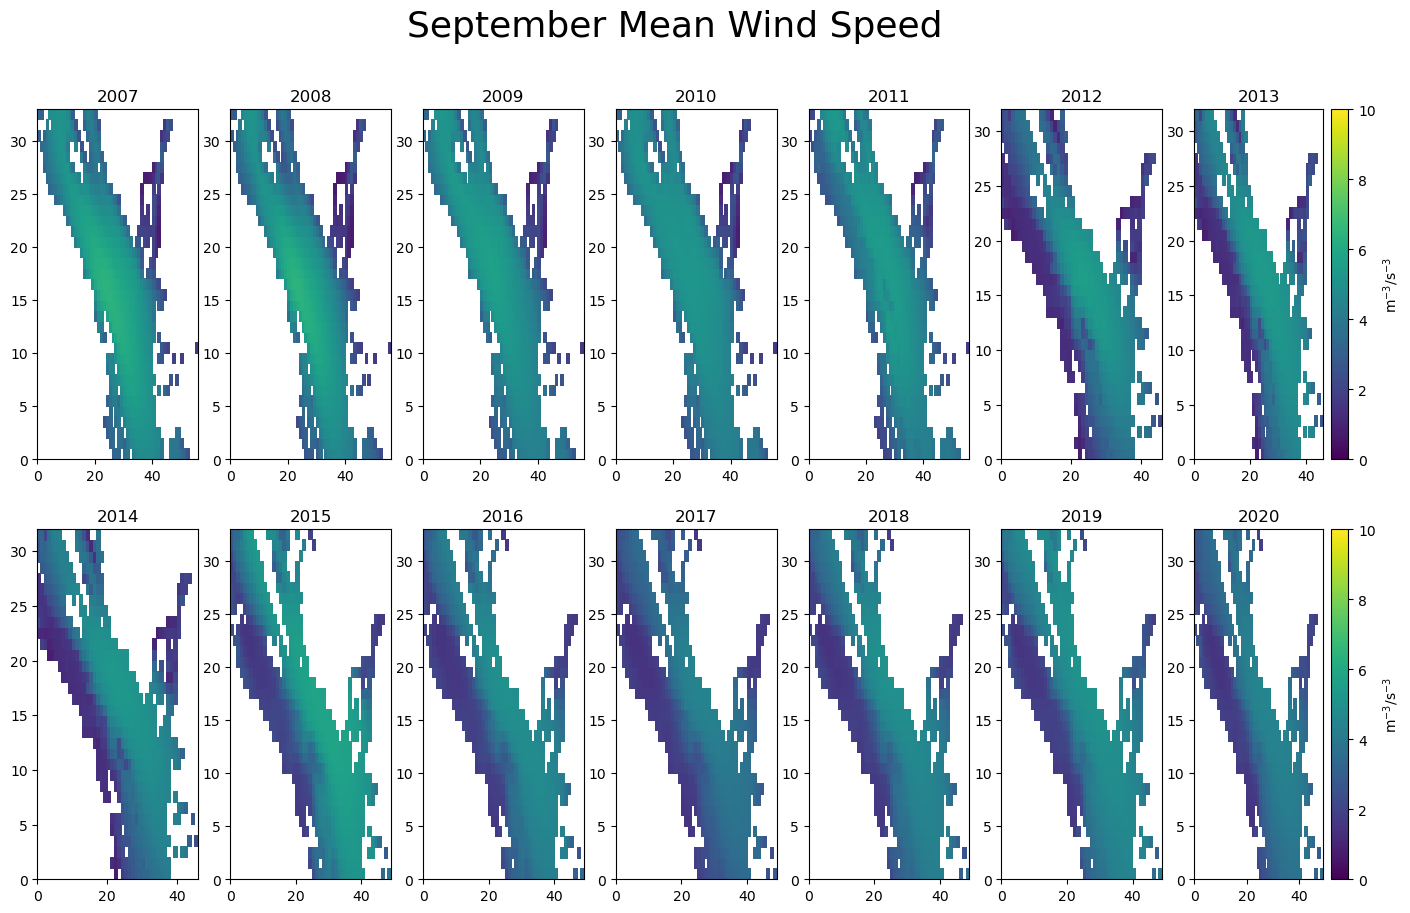

In [76]:
### September winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(sep_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(sep_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(sep_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(sep_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(sep_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(sep_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(sep_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(sep_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(sep_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(sep_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(sep_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(sep_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(sep_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(sep_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('September Mean Wind Speed',fontsize=26)

In [77]:
Sep2007=np.nanmean(sep_gl12007mean)
Sep2008=np.nanmean(sep_gl12008mean)
Sep2009=np.nanmean(sep_gl12009mean)
Sep2010=np.nanmean(sep_gl12010mean)
Sep2011=np.nanmean(sep_gl12011mean)
Sep2012=np.nanmean(sep_gl22012mean)
Sep2013=np.nanmean(sep_gl22013mean)
Sep2014=np.nanmean(sep_gl22014mean)
Sep2015=np.nanmean(sep_ops2015mean)
Sep2016=np.nanmean(sep_ops2016mean)
Sep2017=np.nanmean(sep_ops2017mean)
Sep2018=np.nanmean(sep_ops2018mean)
Sep2019=np.nanmean(sep_ops2019mean)
Sep2020=np.nanmean(sep_ops2020mean)

## October

In [78]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12007=(fu**2+fv**2)**(1/2)
oct_gl12007mean=np.mean(oct_gl12007,0)


year=2008
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12008=(fu**2+fv**2)**(1/2)
oct_gl12008mean=np.mean(oct_gl12008,0)


year=2009
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12009=(fu**2+fv**2)**(1/2)
oct_gl12009mean=np.mean(oct_gl12009,0)


year=2010
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12010=(fu**2+fv**2)**(1/2)
oct_gl12010mean=np.mean(oct_gl12010,0)


year=2011
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl12011=(fu**2+fv**2)**(1/2)
oct_gl12011mean=np.mean(oct_gl12011,0)


year=2012
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl22012=(fu**2+fv**2)**(1/2)
oct_gl22012mean=np.mean(oct_gl22012,0)


year=2013
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl22013=(fu**2+fv**2)**(1/2)
oct_gl22013mean=np.mean(oct_gl22013,0)


year=2014
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_gl22014=(fu**2+fv**2)**(1/2)
oct_gl22014mean=np.mean(oct_gl22014,0)


year=2015
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2015=(fu**2+fv**2)**(1/2)
oct_ops2015mean=np.mean(oct_ops2015,0)


year=2016
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2016=(fu**2+fv**2)**(1/2)
oct_ops2016mean=np.mean(oct_ops2016,0)


year=2017
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2017=(fu**2+fv**2)**(1/2)
oct_ops2017mean=np.mean(oct_ops2017,0)


year=2018
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2018=(fu**2+fv**2)**(1/2)
oct_ops2018mean=np.mean(oct_ops2018,0)


year=2019
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2019=(fu**2+fv**2)**(1/2)
oct_ops2019mean=np.mean(oct_ops2019,0)


year=2020
day=dt.datetime(year,10,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,10,1),dt.datetime(year,10,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
oct_ops2020=(fu**2+fv**2)**(1/2)
oct_ops2020mean=np.mean(oct_ops2020,0)

Text(0.5, 0.98, 'October Mean Wind Speed')

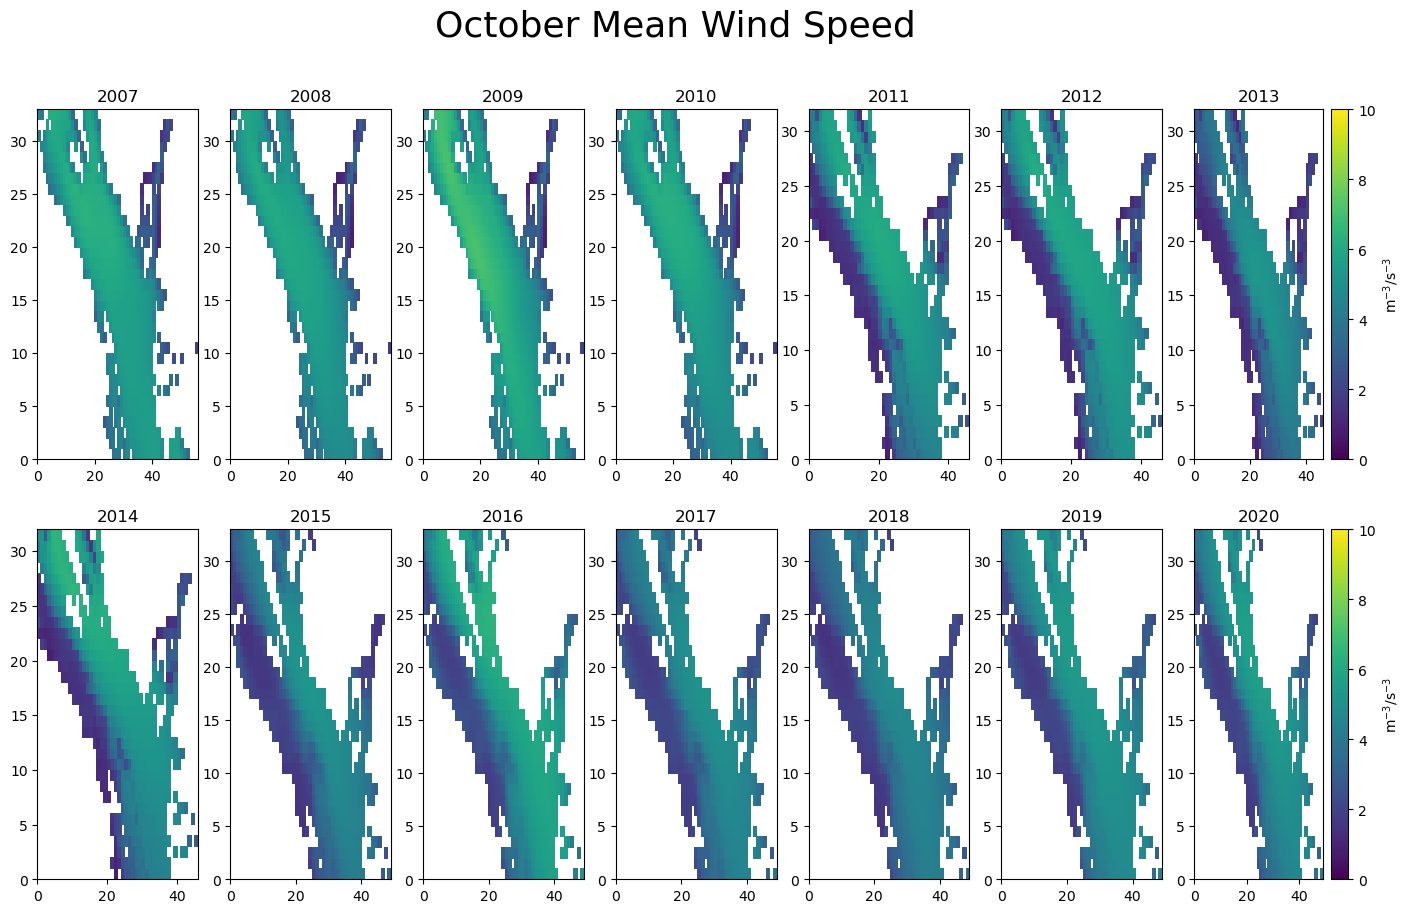

In [79]:
### October winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(oct_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(oct_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(oct_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(oct_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(oct_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(oct_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(oct_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(oct_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(oct_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(oct_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(oct_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(oct_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(oct_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(oct_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('October Mean Wind Speed',fontsize=26)

In [80]:
Oct2007=np.nanmean(oct_gl12007mean)
Oct2008=np.nanmean(oct_gl12008mean)
Oct2009=np.nanmean(oct_gl12009mean)
Oct2010=np.nanmean(oct_gl12010mean)
Oct2011=np.nanmean(oct_gl12011mean)
Oct2012=np.nanmean(oct_gl22012mean)
Oct2013=np.nanmean(oct_gl22013mean)
Oct2014=np.nanmean(oct_gl22014mean)
Oct2015=np.nanmean(oct_ops2015mean)
Oct2016=np.nanmean(oct_ops2016mean)
Oct2017=np.nanmean(oct_ops2017mean)
Oct2018=np.nanmean(oct_ops2018mean)
Oct2019=np.nanmean(oct_ops2019mean)
Oct2020=np.nanmean(oct_ops2020mean)

## November

In [81]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12007=(fu**2+fv**2)**(1/2)
nov_gl12007mean=np.mean(nov_gl12007,0)


year=2008
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12008=(fu**2+fv**2)**(1/2)
nov_gl12008mean=np.mean(nov_gl12008,0)


year=2009
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12009=(fu**2+fv**2)**(1/2)
nov_gl12009mean=np.mean(nov_gl12009,0)


year=2010
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12010=(fu**2+fv**2)**(1/2)
nov_gl12010mean=np.mean(nov_gl12010,0)


year=2011
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl12011=(fu**2+fv**2)**(1/2)
nov_gl12011mean=np.mean(nov_gl12011,0)


year=2012
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl22012=(fu**2+fv**2)**(1/2)
nov_gl22012mean=np.mean(nov_gl22012,0)


year=2013
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl22013=(fu**2+fv**2)**(1/2)
nov_gl22013mean=np.mean(nov_gl22013,0)


year=2014
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,18),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_gl22014=(fu**2+fv**2)**(1/2)
nov_gl22014mean=np.mean(nov_gl22014,0)


year=2015
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2015=(fu**2+fv**2)**(1/2)
nov_ops2015mean=np.mean(nov_ops2015,0)


year=2016
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2016=(fu**2+fv**2)**(1/2)
nov_ops2016mean=np.mean(nov_ops2016,0)


year=2017
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2017=(fu**2+fv**2)**(1/2)
nov_ops2017mean=np.mean(nov_ops2017,0)


year=2018
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2018=(fu**2+fv**2)**(1/2)
nov_ops2018mean=np.mean(nov_ops2018,0)


year=2019
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2019=(fu**2+fv**2)**(1/2)
nov_ops2019mean=np.mean(nov_ops2019,0)


year=2020
day=dt.datetime(year,11,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,11,1),dt.datetime(year,11,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
nov_ops2020=(fu**2+fv**2)**(1/2)
nov_ops2020mean=np.mean(nov_ops2020,0)

Text(0.5, 0.98, 'November Mean Wind Speed')

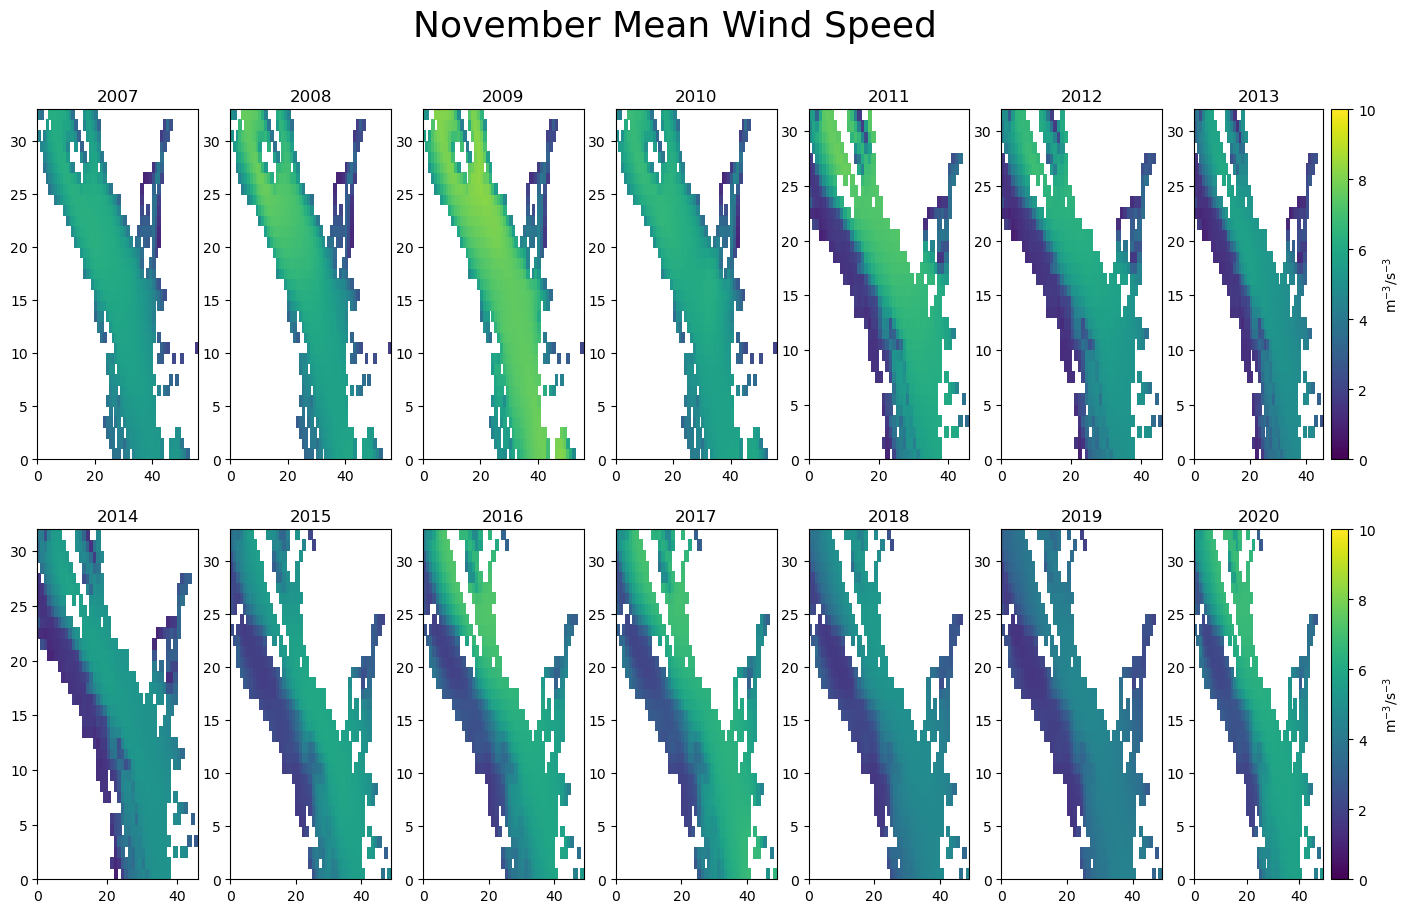

In [82]:
### November winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(nov_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(nov_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(nov_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(nov_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(nov_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(nov_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(nov_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(nov_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(nov_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(nov_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(nov_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(nov_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(nov_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(nov_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('November Mean Wind Speed',fontsize=26)

In [83]:
Nov2007=np.nanmean(nov_gl12007mean)
Nov2008=np.nanmean(nov_gl12008mean)
Nov2009=np.nanmean(nov_gl12009mean)
Nov2010=np.nanmean(nov_gl12010mean)
Nov2011=np.nanmean(nov_gl12011mean)
Nov2012=np.nanmean(nov_gl22012mean)
Nov2013=np.nanmean(nov_gl22013mean)
Nov2014=np.nanmean(nov_gl22014mean)
Nov2015=np.nanmean(nov_ops2015mean)
Nov2016=np.nanmean(nov_ops2016mean)
Nov2017=np.nanmean(nov_ops2017mean)
Nov2018=np.nanmean(nov_ops2018mean)
Nov2019=np.nanmean(nov_ops2019mean)
Nov2020=np.nanmean(nov_ops2020mean)

## December

In [84]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12007=(fu**2+fv**2)**(1/2)
dec_gl12007mean=np.mean(dec_gl12007,0)


year=2008
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12008=(fu**2+fv**2)**(1/2)
dec_gl12008mean=np.mean(dec_gl12008,0)


year=2009
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12009=(fu**2+fv**2)**(1/2)
dec_gl12009mean=np.mean(dec_gl12009,0)


year=2010
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12010=(fu**2+fv**2)**(1/2)
dec_gl12010mean=np.mean(dec_gl12010,0)


year=2011
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl12011=(fu**2+fv**2)**(1/2)
dec_gl12011mean=np.mean(dec_gl12011,0)


year=2012
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl22012=(fu**2+fv**2)**(1/2)
dec_gl22012mean=np.mean(dec_gl22012,0)


year=2013
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_gl22013=(fu**2+fv**2)**(1/2)
dec_gl22013mean=np.mean(dec_gl22013,0)


#year=2014
#day=dt.datetime(year,12,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#dec_ops2014=(fu**2+fv**2)**(3/2)
#dec_ops2014mean=np.mean(dec_ops2014,0)


year=2015
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2015=(fu**2+fv**2)**(1/2)
dec_ops2015mean=np.mean(dec_ops2015,0)


year=2016
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2016=(fu**2+fv**2)**(1/2)
dec_ops2016mean=np.mean(dec_ops2016,0)


year=2017
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2017=(fu**2+fv**2)**(1/2)
dec_ops2017mean=np.mean(dec_ops2017,0)


year=2018
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2018=(fu**2+fv**2)**(1/2)
dec_ops2018mean=np.mean(dec_ops2018,0)


year=2019
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2019=(fu**2+fv**2)**(1/2)
dec_ops2019mean=np.mean(dec_ops2019,0)


year=2020
day=dt.datetime(year,12,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,12,1),dt.datetime(year,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
dec_ops2020=(fu**2+fv**2)**(1/2)
dec_ops2020mean=np.mean(dec_ops2020,0)

Text(0.5, 0.98, 'December Mean Wind Speed')

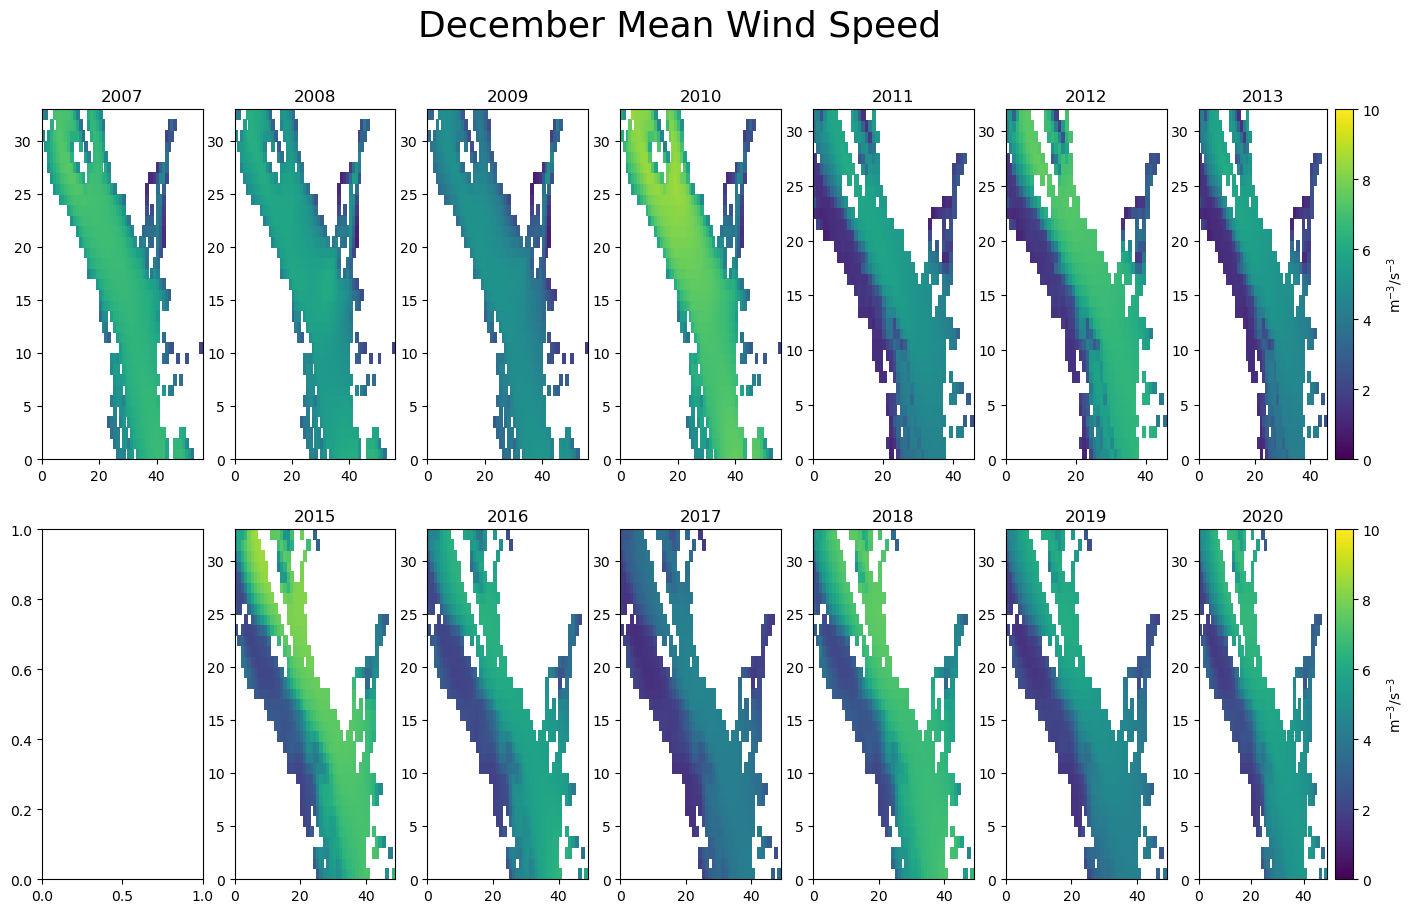

In [85]:
### December winds
fig,ax=plt.subplots(2,7,figsize=(17,10))
vmin=0
vmax=10

iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(dec_gl12007mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(dec_gl12008mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(dec_gl12009mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(dec_gl12010mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(dec_gl12011mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(dec_gl22012mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(dec_gl22013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
    
#iax=ax[1,0]
#iax.set_title('2014')
#m=iax.pcolormesh(dec_gl22014mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(dec_ops2015mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(dec_ops2016mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(dec_ops2017mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(dec_ops2018mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(dec_ops2019mean,vmin=vmin, vmax=vmax)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(dec_ops2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='m$^{-3}$/s$^{-3}$')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')

fig.suptitle('December Mean Wind Speed',fontsize=26)

In [86]:
Dec2007=np.nanmean(dec_gl12007mean)
Dec2008=np.nanmean(dec_gl12008mean)
Dec2009=np.nanmean(dec_gl12009mean)
Dec2010=np.nanmean(dec_gl12010mean)
Dec2011=np.nanmean(dec_gl12011mean)
Dec2012=np.nanmean(dec_gl22012mean)
Dec2013=np.nanmean(dec_gl22013mean)
#Dec2014=np.nanmean(dec_gl22014mean)
Dec2015=np.nanmean(dec_ops2015mean)
Dec2016=np.nanmean(dec_ops2016mean)
Dec2017=np.nanmean(dec_ops2017mean)
Dec2018=np.nanmean(dec_ops2018mean)
Dec2019=np.nanmean(dec_ops2019mean)
Dec2020=np.nanmean(dec_ops2020mean)

In [101]:
Jan_W=(Jan2015+Jan2018+Jan2019+Jan2020)/4
Feb_W=(Feb2015+Feb2018+Feb2019+Jan2020)/4
Mar_W=(Mar2015+Mar2018+Mar2019+Mar2020)/4
Apr_W=(Apr2015+Apr2018+Apr2019+Apr2020)/4
May_W=(May2015+May2018+May2019+May2020)/4
Jun_W=(Jun2015+Jun2018+Jun2019+Jun2020)/4
Jul_W=(Jul2015+Jul2018+Jul2019+Jul2020)/4
Aug_W=(Aug2015+Aug2018+Aug2019+Aug2020)/4
Sep_W=(Sep2015+Sep2018+Sep2019+Sep2020)/4
Oct_W=(Oct2015+Oct2018+Oct2019+Oct2020)/4
Nov_W=(Nov2015+Nov2018+Nov2019+Nov2020)/4
Dec_W=(Dec2015+Dec2018+Dec2019+Dec2020)/4

In [102]:
Jan_3W=(Jan2018+Jan2019+Jan2020)/3
Feb_3W=(Feb2018+Feb2019+Jan2020)/3
Mar_3W=(Mar2018+Mar2019+Mar2020)/3
Apr_3W=(Apr2018+Apr2019+Apr2020)/3
May_3W=(May2018+May2019+May2020)/3
Jun_3W=(Jun2018+Jun2019+Jun2020)/3
Jul_3W=(Jul2018+Jul2019+Jul2020)/3
Aug_3W=(Aug2018+Aug2019+Aug2020)/3
Sep_3W=(Sep2018+Sep2019+Sep2020)/3
Oct_3W=(Oct2018+Oct2019+Oct2020)/3
Nov_3W=(Nov2018+Nov2019+Nov2020)/3
Dec_3W=(Dec2018+Dec2019+Dec2020)/3

In [103]:
Jan_C=(Jan2008+Jan2010+Jan2011+Jan2012)/4
Feb_C=(Feb2008+Feb2010+Feb2011+Jan2012)/4
Mar_C=(Mar2008+Mar2010+Mar2011+Mar2012)/4
Apr_C=(Apr2008+Apr2010+Apr2011+Apr2012)/4
May_C=(May2008+May2010+May2011+May2012)/4
Jun_C=(Jun2008+Jun2010+Jun2011+Jun2012)/4
Jul_C=(Jul2008+Jul2010+Jul2011+Jul2012)/4
Aug_C=(Aug2008+Aug2010+Aug2011+Aug2012)/4
Sep_C=(Sep2008+Sep2010+Sep2011+Sep2012)/4
Oct_C=(Oct2008+Oct2010+Oct2011+Oct2012)/4
Nov_C=(Nov2008+Nov2010+Nov2011+Nov2012)/4
Dec_C=(Dec2008+Dec2010+Dec2011+Dec2012)/4

In [104]:
Jan_3C=(Jan2008+Jan2010+Jan2012)/3
Feb_3C=(Feb2008+Feb2010+Jan2012)/3
Mar_3C=(Mar2008+Mar2010+Mar2012)/3
Apr_3C=(Apr2008+Apr2010+Apr2012)/3
May_3C=(May2008+May2010+May2012)/3
Jun_3C=(Jun2008+Jun2010+Jun2012)/3
Jul_3C=(Jul2008+Jul2010+Jul2012)/3
Aug_3C=(Aug2008+Aug2010+Aug2012)/3
Sep_3C=(Sep2008+Sep2010+Sep2012)/3
Oct_3C=(Oct2008+Oct2010+Oct2012)/3
Nov_3C=(Nov2008+Nov2010+Nov2012)/3
Dec_3C=(Dec2008+Dec2010+Dec2012)/3

In [105]:
print(Jan_C,Feb_C, Mar_C, Apr_C,May_C,\
      Jun_C, Jul_C,Aug_C,Sep_C,Oct_C,\
     Nov_C,Dec_C)

5.255556106567383 4.943120002746582 5.280871868133545 4.541804313659668 4.1618571281433105 4.005492687225342 4.127147674560547 4.005497932434082 4.025290012359619 4.468635082244873 5.065437316894531 5.1902337074279785


In [106]:
print(Jan_W,Feb_W, Mar_W, Apr_W,May_W,\
      Jun_W,Jul_W,Aug_W,Sep_W,Oct_W,\
     Nov_W,Dec_W)

4.4879350662231445 4.2724103927612305 3.360086679458618 3.922926187515259 3.1792898178100586 3.588247537612915 3.384995937347412 3.394467830657959 3.5997471809387207 3.6979005336761475 4.087904453277588 4.875214576721191


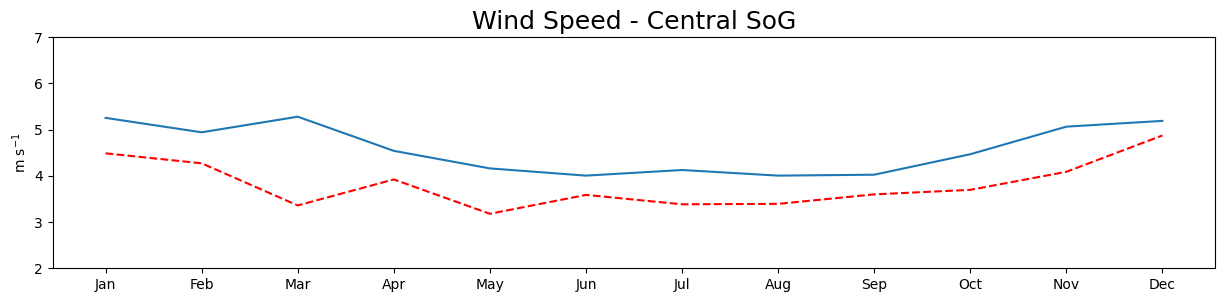

In [110]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y=[Jan_C,Feb_C,Mar_C,Apr_C,May_C,Jun_C,Jul_C,Aug_C,Sep_C,Oct_C,Nov_C,Dec_C]
y2=[Jan_W,Feb_W,Mar_W,Apr_W,May_W,Jun_W,Jul_W,Aug_W,Sep_W,Oct_W,Nov_W,Dec_W]

ax.plot(x, y,label='NPGO+ coldest')
ax.plot(x, y2,label='NPGO- warmest',color='r',linestyle='--')

ax.set_title('Wind Speed - Central SoG',fontsize=18)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')

a=2
b=5
c=5
d=8
#plt.fill([a, a, b, b], [0, 200, 200, 0], color = 'lightgreen', alpha = 0.1)
#plt.fill([c, c, d, d], [0, 200, 200, 0], color = 'wheat', alpha = 0.2)

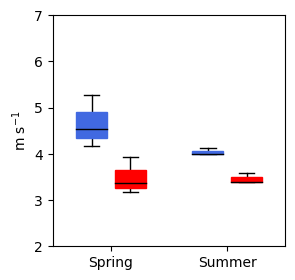

In [112]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=False, positions=pos,widths=0.4)
    for item in ['boxes']:
        plt.setp(bp[item], color=color)
    for item in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='k')


data1 = [Mar_C,Apr_C,May_C]
data2 = [Mar_W,Apr_W,May_W]
data3 = [Jun_C,Jul_C,Aug_C]
data4 = [Jun_W,Jul_W,Aug_W]

fig, ax = plt.subplots(figsize=(3,3))
bp1 = color_boxplot(data1, 'royalblue', [1])
bp2 = color_boxplot(data2, 'r', [1.5])
bp3 = color_boxplot(data3, 'royalblue', [2.5])
bp4 = color_boxplot(data4, 'r', [3])
#ax.autoscale()
ax.set(xticks=[1.25,2.75], xticklabels=['Spring','Summer'])
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')
#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')
plt.show()

In [113]:
Jan_W_years=(Jan2015,Jan2018,Jan2019,Jan2020)
Feb_W_years=(Feb2015,Feb2018,Feb2019,Jan2020)
Mar_W_years=(Mar2015,Mar2018,Mar2019,Mar2020)
Apr_W_years=(Apr2015,Apr2018,Apr2019,Apr2020)
May_W_years=(May2015,May2018,May2019,May2020)
Jun_W_years=(Jun2015,Jun2018,Jun2019,Jun2020)
Jul_W_years=(Jul2015,Jul2018,Jul2019,Jul2020)
Aug_W_years=(Aug2015,Aug2018,Aug2019,Aug2020)
Sep_W_years=(Sep2015,Sep2018,Sep2019,Sep2020)
Oct_W_years=(Oct2015,Oct2018,Oct2019,Oct2020)
Nov_W_years=(Nov2015,Nov2018,Nov2019,Nov2020)
Dec_W_years=(Dec2015,Dec2018,Dec2019,Dec2020)

In [114]:
Jan_C_years=(Jan2008,Jan2010,Jan2011,Jan2012)
Feb_C_years=(Feb2008,Feb2010,Feb2011,Jan2012)
Mar_C_years=(Mar2008,Mar2010,Mar2011,Mar2012)
Apr_C_years=(Apr2008,Apr2010,Apr2011,Apr2012)
May_C_years=(May2008,May2010,May2011,May2012)
Jun_C_years=(Jun2008,Jun2010,Jun2011,Jun2012)
Jul_C_years=(Jul2008,Jul2010,Jul2011,Jul2012)
Aug_C_years=(Aug2008,Aug2010,Aug2011,Aug2012)
Sep_C_years=(Sep2008,Sep2010,Sep2011,Sep2012)
Oct_C_years=(Oct2008,Oct2010,Oct2011,Oct2012)
Nov_C_years=(Nov2008,Nov2010,Nov2011,Nov2012)
Dec_C_years=(Dec2008,Dec2010,Dec2011,Dec2012)

In [116]:
from scipy.stats import sem

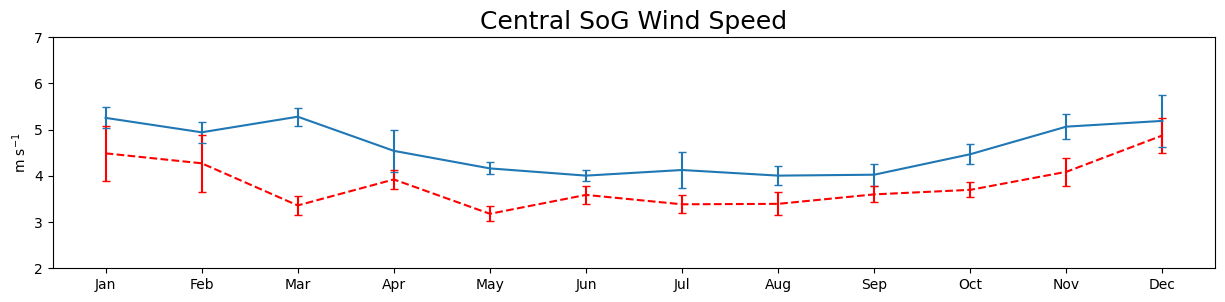

In [145]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y=[Jan_C,Feb_C,Mar_C,Apr_C,May_C,Jun_C,Jul_C,Aug_C,Sep_C,Oct_C,Nov_C,Dec_C]
y2=[Jan_W,Feb_W,Mar_W,Apr_W,May_W,Jun_W,Jul_W,Aug_W,Sep_W,Oct_W,Nov_W,Dec_W]
err1=[sem(Jan_C_years),sem(Feb_C_years),sem(Mar_C_years),sem(Apr_C_years),sem(May_C_years),sem(Jun_C_years),\
     sem(Jul_C_years),sem(Aug_C_years),sem(Sep_C_years),sem(Oct_C_years),sem(Nov_C_years),sem(Dec_C_years)]
err2=[sem(Jan_W_years),sem(Feb_W_years),sem(Mar_W_years),sem(Apr_W_years),sem(May_W_years),sem(Jun_W_years),\
     sem(Jul_W_years),sem(Aug_W_years),sem(Sep_W_years),sem(Oct_W_years),sem(Nov_W_years),sem(Dec_W_years)]

ax.errorbar(x, y, yerr= err1, capsize=3,label='NPGO+ coldest')
ax.errorbar(x, y2,yerr= err2, capsize=3,linestyle='--',label='NPGO- warmest',color='r')

ax.set_title('Central SoG Wind Speed',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')

a=2
b=5
c=5
d=8
#plt.fill([a, a, b, b], [0, 200, 200, 0], color = 'lightgreen', alpha = 0.1)
#plt.fill([c, c, d, d], [0, 200, 200, 0], color = 'wheat', alpha = 0.2)

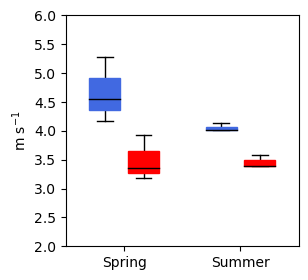

In [147]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=False, positions=pos,widths=0.4)
    for item in ['boxes']:
        plt.setp(bp[item], color=color)
    for item in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='k')


data1 = [Mar_C,Apr_C,May_C]
data2 = [Mar_W,Apr_W,May_W]
data3 = [Jun_C,Jul_C,Aug_C]
data4 = [Jun_W,Jul_W,Aug_W]

fig, ax = plt.subplots(figsize=(3,3))
bp1 = color_boxplot(data1, 'royalblue', [1])
bp2 = color_boxplot(data2, 'r', [1.5])
bp3 = color_boxplot(data3, 'royalblue', [2.5])
bp4 = color_boxplot(data4, 'r', [3])
#ax.autoscale()
ax.set(xticks=[1.25,2.75], xticklabels=['Spring','Summer'])
ax.set_ylim(2,6)
ax.set_ylabel('m s$^{-1}$')
#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')
plt.show()

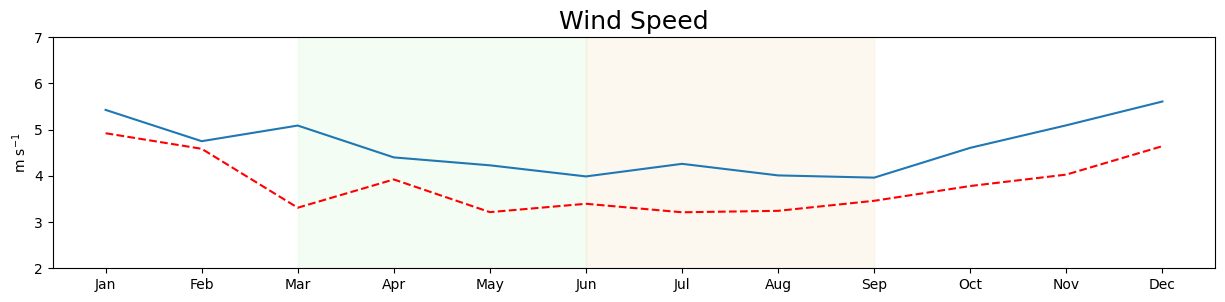

In [118]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y=[Jan_3C,Feb_3C,Mar_3C,Apr_3C,May_3C,Jun_3C,Jul_3C,Aug_3C,Sep_3C,Oct_3C,Nov_3C,Dec_3C]
y2=[Jan_3W,Feb_3W,Mar_3W,Apr_3W,May_3W,Jun_3W,Jul_3W,Aug_3W,Sep_3W,Oct_3W,Nov_3W,Dec_3W]

ax.plot(x, y,label='NPGO+ coldest')
ax.plot(x, y2,label='NPGO- warmest',color='r',linestyle='--')

ax.set_title('Wind Speed',fontsize=18)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')

a=2
b=5
c=5
d=8
plt.fill([a, a, b, b], [0, 200, 200, 0], color = 'lightgreen', alpha = 0.1)
plt.fill([c, c, d, d], [0, 200, 200, 0], color = 'wheat', alpha = 0.2)

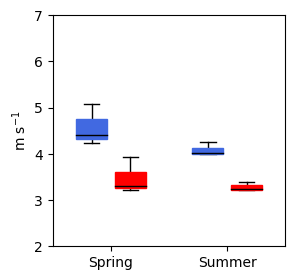

In [119]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=False, positions=pos,widths=0.4)
    for item in ['boxes']:
        plt.setp(bp[item], color=color)
    for item in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='k')


data1 = [Mar_3C,Apr_3C,May_3C]
data2 = [Mar_3W,Apr_3W,May_3W]
data3 = [Jun_3C,Jul_3C,Aug_3C]
data4 = [Jun_3W,Jul_3W,Aug_3W]

fig, ax = plt.subplots(figsize=(3,3))
bp1 = color_boxplot(data1, 'royalblue', [1])
bp2 = color_boxplot(data2, 'r', [1.5])
bp3 = color_boxplot(data3, 'royalblue', [2.5])
bp4 = color_boxplot(data4, 'r', [3])
#ax.autoscale()
ax.set(xticks=[1.25,2.75], xticklabels=['Spring','Summer'])
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')
#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')
plt.show()

Text(0, 0.5, 'm s$^{-1}$')

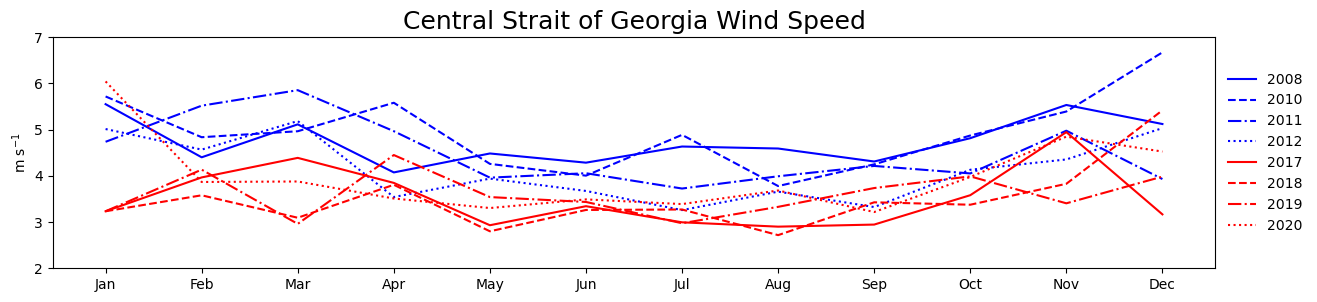

In [123]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y1=[None,Feb2007,Mar2007,Apr2007,May2007,Jun2007,Jul2007,Aug2007,Sep2007,Oct2007,Nov2007,Dec2007]
y2=[Jan2008,Feb2008,Mar2008,Apr2008,May2008,Jun2008,Jul2008,Aug2008,Sep2008,Oct2008,Nov2008,Dec2008]
y3=[Jan2009,Feb2009,Mar2009,Apr2009,May2009,Jun2009,Jul2009,Aug2009,Sep2009,Oct2009,Nov2009,Dec2009]
y4=[Jan2010,Feb2010,Mar2010,Apr2010,May2010,Jun2010,Jul2010,Aug2010,Sep2010,Oct2010,Nov2010,Dec2010]
y5=[Jan2011,Feb2011,Mar2011,Apr2011,May2011,Jun2011,Jul2011,Aug2011,Sep2011,Oct2011,Nov2011,Dec2011]
y6=[Jan2012,Feb2012,Mar2012,Apr2012,May2012,Jun2012,Jul2012,Aug2012,Sep2012,Oct2012,Nov2012,Dec2012]
y7=[Jan2013,Feb2013,Mar2013,Apr2013,May2013,Jun2013,Jul2013,Aug2013,Sep2013,Oct2013,Nov2013,Dec2013]
y8=[Jan2013,Feb2014,Mar2014,Apr2014,May2014,Jun2014,Jul2014,Aug2014,Sep2014,Oct2014,Nov2014,None]
y9=[Jan2013,Feb2015,Mar2015,Apr2015,May2015,Jun2015,Jul2015,Aug2015,Sep2015,Oct2015,Nov2015,Dec2015]
y10=[Jan2013,Feb2016,Mar2016,Apr2016,May2016,Jun2016,Jul2016,Aug2016,Sep2016,Oct2016,Nov2016,Dec2016]
y11=[Jan2013,Feb2017,Mar2017,Apr2017,May2017,Jun2017,Jul2017,Aug2017,Sep2017,Oct2017,Nov2017,Dec2017]
y12=[Jan2013,Feb2018,Mar2018,Apr2018,May2018,Jun2018,Jul2018,Aug2018,Sep2018,Oct2018,Nov2018,Dec2018]
y13=[Jan2013,Feb2019,Mar2019,Apr2019,May2019,Jun2019,Jul2019,Aug2019,Sep2019,Oct2019,Nov2019,Dec2019]
y14=[Jan2020,Feb2020,Mar2020,Apr2020,May2020,Jun2020,Jul2020,Aug2020,Sep2020,Oct2020,Nov2020,Dec2020]

#ax.plot(x, y1,label='2007')
ax.plot(x, y2,label='2008',color='b',linestyle='-')
#ax.plot(x, y3,label='2009')
ax.plot(x, y4,label='2010',color='b',linestyle='--')
ax.plot(x, y5,label='2011',color='b',linestyle='-.')
ax.plot(x, y6,label='2012',color='b',linestyle=':')
#ax.plot(x, y7,label='2013')
#ax.plot(x, y8,label='2014',linestyle='--'
#ax.plot(x, y9,label='2015',linestyle='--')
#ax.plot(x, y10,label='2016',linestyle='--')
ax.plot(x, y11,label='2017',color='r',linestyle='-')
ax.plot(x, y12,label='2018',color='r',linestyle='--')
ax.plot(x, y13,label='2019',color='r',linestyle='-.')
ax.plot(x, y14,label='2020',color='r',linestyle=':')

ax.set_title('Central Strait of Georgia Wind Speed',fontsize=18)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')

Text(0, 0.5, 'm s$^{-1}$')

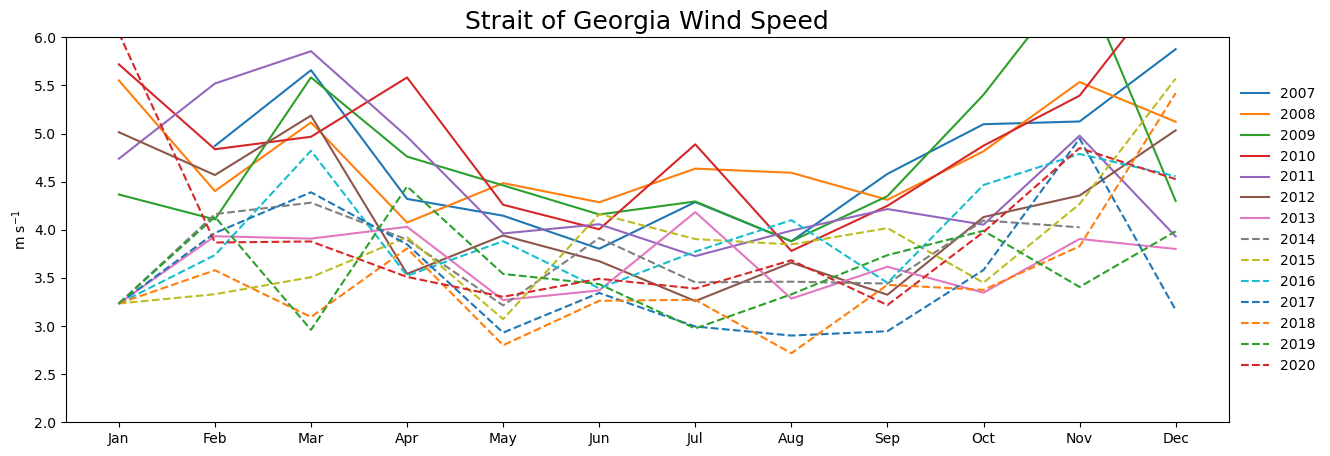

In [98]:
fig, ax = plt.subplots(figsize=(15, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y1=[None,Feb2007,Mar2007,Apr2007,May2007,Jun2007,Jul2007,Aug2007,Sep2007,Oct2007,Nov2007,Dec2007]
y2=[Jan2008,Feb2008,Mar2008,Apr2008,May2008,Jun2008,Jul2008,Aug2008,Sep2008,Oct2008,Nov2008,Dec2008]
y3=[Jan2009,Feb2009,Mar2009,Apr2009,May2009,Jun2009,Jul2009,Aug2009,Sep2009,Oct2009,Nov2009,Dec2009]
y4=[Jan2010,Feb2010,Mar2010,Apr2010,May2010,Jun2010,Jul2010,Aug2010,Sep2010,Oct2010,Nov2010,Dec2010]
y5=[Jan2011,Feb2011,Mar2011,Apr2011,May2011,Jun2011,Jul2011,Aug2011,Sep2011,Oct2011,Nov2011,Dec2011]
y6=[Jan2012,Feb2012,Mar2012,Apr2012,May2012,Jun2012,Jul2012,Aug2012,Sep2012,Oct2012,Nov2012,Dec2012]
y7=[Jan2013,Feb2013,Mar2013,Apr2013,May2013,Jun2013,Jul2013,Aug2013,Sep2013,Oct2013,Nov2013,Dec2013]
y8=[Jan2013,Feb2014,Mar2014,Apr2014,May2014,Jun2014,Jul2014,Aug2014,Sep2014,Oct2014,Nov2014,None]
y9=[Jan2013,Feb2015,Mar2015,Apr2015,May2015,Jun2015,Jul2015,Aug2015,Sep2015,Oct2015,Nov2015,Dec2015]
y10=[Jan2013,Feb2016,Mar2016,Apr2016,May2016,Jun2016,Jul2016,Aug2016,Sep2016,Oct2016,Nov2016,Dec2016]
y11=[Jan2013,Feb2017,Mar2017,Apr2017,May2017,Jun2017,Jul2017,Aug2017,Sep2017,Oct2017,Nov2017,Dec2017]
y12=[Jan2013,Feb2018,Mar2018,Apr2018,May2018,Jun2018,Jul2018,Aug2018,Sep2018,Oct2018,Nov2018,Dec2018]
y13=[Jan2013,Feb2019,Mar2019,Apr2019,May2019,Jun2019,Jul2019,Aug2019,Sep2019,Oct2019,Nov2019,Dec2019]
y14=[Jan2020,Feb2020,Mar2020,Apr2020,May2020,Jun2020,Jul2020,Aug2020,Sep2020,Oct2020,Nov2020,Dec2020]

ax.plot(x, y1,label='2007')
ax.plot(x, y2,label='2008')
ax.plot(x, y3,label='2009')
ax.plot(x, y4,label='2010')
ax.plot(x, y5,label='2011')
ax.plot(x, y6,label='2012')
ax.plot(x, y7,label='2013')
ax.plot(x, y8,label='2014',linestyle='--')
ax.plot(x, y9,label='2015',linestyle='--')
ax.plot(x, y10,label='2016',linestyle='--')
ax.plot(x, y11,label='2017',linestyle='--')
ax.plot(x, y12,label='2018',linestyle='--')
ax.plot(x, y13,label='2019',linestyle='--')
ax.plot(x, y14,label='2020',linestyle='--')

ax.set_title('Strait of Georgia Wind Speed',fontsize=18)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(2,6)
ax.set_ylabel('m s$^{-1}$')

In [99]:
JanMean=(Jan2008+Jan2009+Jan2010+Jan2011+Jan2012+Jan2013+Jan2014+Jan2015+Jan2016+Jan2017+Jan2018+Jan2019+Jan2020)/13
FebMean=(Feb2007+Feb2008+Feb2009+Feb2010+Feb2011+Feb2012+Feb2013+Feb2014+Feb2015+Feb2016+Feb2017+Feb2018+Feb2019+Feb2020)/14
MarMean=(Mar2007+Mar2008+Mar2009+Mar2010+Mar2011+Mar2012+Mar2013+Mar2014+Mar2015+Mar2016+Mar2017+Mar2018+Mar2019+Mar2020)/14
AprMean=(Apr2007+Apr2008+Apr2009+Apr2010+Apr2011+Apr2012+Apr2013+Apr2014+Apr2015+Apr2016+Apr2017+Apr2018+Apr2019+Apr2020)/14
MayMean=(May2007+May2008+May2009+May2010+May2011+May2012+May2013+May2014+May2015+May2016+May2017+May2018+May2019+May2020)/14
JunMean=(Jun2007+Jun2008+Jun2009+Jun2010+Jun2011+Jun2012+Jun2013+Jun2014+Jun2015+Jun2016+Jun2017+Jun2018+Jun2019+Jun2020)/14
JulMean=(Jul2007+Jul2008+Jul2009+Jul2010+Jul2011+Jul2012+Jul2013+Jul2014+Jul2015+Jul2016+Jul2017+Jul2018+Jul2019+Jul2020)/14
AugMean=(Aug2007+Aug2008+Aug2009+Aug2010+Aug2011+Aug2012+Aug2013+Aug2014+Aug2015+Aug2016+Aug2017+Aug2018+Aug2019+Aug2020)/14
SepMean=(Sep2007+Sep2008+Sep2009+Sep2010+Sep2011+Sep2012+Sep2013+Sep2014+Sep2015+Sep2016+Sep2017+Sep2018+Sep2019+Sep2020)/14
OctMean=(Oct2007+Oct2008+Oct2009+Oct2010+Oct2011+Oct2012+Oct2013+Oct2014+Oct2015+Oct2016+Oct2017+Oct2018+Oct2019+Oct2020)/14
NovMean=(Nov2007+Nov2008+Nov2009+Nov2010+Nov2011+Nov2012+Nov2013+Nov2014+Nov2015+Nov2016+Nov2017+Nov2018+Nov2019+Nov2020)/14
DecMean=(Dec2007+Dec2008+Dec2009+Dec2010+Dec2011+Dec2012+Dec2013+Dec2015+Dec2016+Dec2017+Dec2018+Dec2019+Dec2020)/13

Text(0, 0.5, 'Anomalies (m s$^{-1}$)')

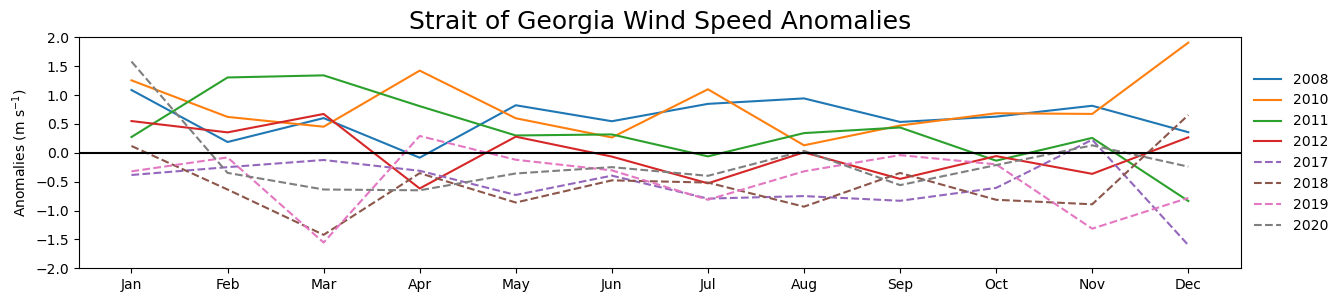

In [100]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y1=[None,(Feb2007-FebMean),(Mar2007-MarMean),(Apr2007-AprMean),(May2007-MayMean),(Jun2007-JunMean),(Jul2007-JulMean),(Aug2007-AugMean),(Sep2007-SepMean),(Oct2007-OctMean),(Nov2007-NovMean),(Dec2007-DecMean)]
y2=[(Jan2008-JanMean),(Feb2008-FebMean),(Mar2008-MarMean),(Apr2008-AprMean),(May2008-MayMean),(Jun2008-JunMean),(Jul2008-JulMean),(Aug2008-AugMean),(Sep2008-SepMean),(Oct2008-OctMean),(Nov2008-NovMean),(Dec2008-DecMean)]
#y3=[(Jan2009-JanMean),(Feb2009-FebMean),(Mar2009-MarMean),(Apr2009-AprMean),(May2009-MayMean),(Jun2009-JunMean),(Jul2009-JulMean),(Aug2009-AugMean),(Sep2009-SepMean),(Oct2009-OctMean),(Nov2009-NovMean),(Dec2009-DecMean)]
y4=[(Jan2010-JanMean),(Feb2010-FebMean),(Mar2010-MarMean),(Apr2010-AprMean),(May2010-MayMean),(Jun2010-JunMean),(Jul2010-JulMean),(Aug2010-AugMean),(Sep2010-SepMean),(Oct2010-OctMean),(Nov2010-NovMean),(Dec2010-DecMean)]
y5=[(Jan2011-JanMean),(Feb2011-FebMean),(Mar2011-MarMean),(Apr2011-AprMean),(May2011-MayMean),(Jun2011-JunMean),(Jul2011-JulMean),(Aug2011-AugMean),(Sep2011-SepMean),(Oct2011-OctMean),(Nov2011-NovMean),(Dec2011-DecMean)]
y6=[(Jan2012-JanMean),(Feb2012-FebMean),(Mar2012-MarMean),(Apr2012-AprMean),(May2012-MayMean),(Jun2012-JunMean),(Jul2012-JulMean),(Aug2012-AugMean),(Sep2012-SepMean),(Oct2012-OctMean),(Nov2012-NovMean),(Dec2012-DecMean)]
y7=[(Jan2013-JanMean),(Feb2013-FebMean),(Mar2013-MarMean),(Apr2013-AprMean),(May2013-MayMean),(Jun2013-JunMean),(Jul2013-JulMean),(Aug2013-AugMean),(Sep2013-SepMean),(Oct2013-OctMean),(Nov2013-NovMean),(Dec2013-DecMean)]
y8=[(Jan2014-JanMean),(Feb2014-FebMean),(Mar2014-MarMean),(Apr2014-AprMean),(May2014-MayMean),(Jun2014-JunMean),(Jul2014-JulMean),(Aug2014-AugMean),(Sep2014-SepMean),(Oct2014-OctMean),(Nov2014-NovMean),None]
y9=[(Jan2015-JanMean),(Feb2015-FebMean),(Mar2015-MarMean),(Apr2015-AprMean),(May2015-MayMean),(Jun2015-JunMean),(Jul2015-JulMean),(Aug2015-AugMean),(Sep2015-SepMean),(Oct2015-OctMean),(Nov2015-NovMean),(Dec2015-DecMean)]
y10=[(Jan2016-JanMean),(Feb2016-FebMean),(Mar2016-MarMean),(Apr2016-AprMean),(May2016-MayMean),(Jun2016-JunMean),(Jul2016-JulMean),(Aug2016-AugMean),(Sep2016-SepMean),(Oct2016-OctMean),(Nov2016-NovMean),(Dec2016-DecMean)]
y11=[(Jan2017-JanMean),(Feb2017-FebMean),(Mar2017-MarMean),(Apr2017-AprMean),(May2017-MayMean),(Jun2017-JunMean),(Jul2017-JulMean),(Aug2017-AugMean),(Sep2017-SepMean),(Oct2017-OctMean),(Nov2017-NovMean),(Dec2017-DecMean)]
y12=[(Jan2018-JanMean),(Feb2018-FebMean),(Mar2018-MarMean),(Apr2018-AprMean),(May2018-MayMean),(Jun2018-JunMean),(Jul2018-JulMean),(Aug2018-AugMean),(Sep2018-SepMean),(Oct2018-OctMean),(Nov2018-NovMean),(Dec2018-DecMean)]
y13=[(Jan2019-JanMean),(Feb2019-FebMean),(Mar2019-MarMean),(Apr2019-AprMean),(May2019-MayMean),(Jun2019-JunMean),(Jul2019-JulMean),(Aug2019-AugMean),(Sep2019-SepMean),(Oct2019-OctMean),(Nov2019-NovMean),(Dec2019-DecMean)]
y14=[(Jan2020-JanMean),(Feb2020-FebMean),(Mar2020-MarMean),(Apr2020-AprMean),(May2020-MayMean),(Jun2020-JunMean),(Jul2020-JulMean),(Aug2020-AugMean),(Sep2020-SepMean),(Oct2020-OctMean),(Nov2020-NovMean),(Dec2020-DecMean)]

#ax.plot(x, y1,label='2007')
ax.plot(x, y2,label='2008')
#ax.plot(x, y3,label='2009')
ax.plot(x, y4,label='2010')
ax.plot(x, y5,label='2011')
ax.plot(x, y6,label='2012')
#ax.plot(x, y7,label='2013')
#ax.plot(x, y8,label='2014',linestyle='--')
#ax.plot(x, y9,label='2015',linestyle='--')
#ax.plot(x, y10,label='2016',linestyle='--')
ax.plot(x, y11,label='2017',linestyle='--')
ax.plot(x, y12,label='2018',linestyle='--')
ax.plot(x, y13,label='2019',linestyle='--')
ax.plot(x, y14,label='2020',linestyle='--')
ax.axhline(y=0,linestyle='-',color='k')

ax.set_title('Strait of Georgia Wind Speed Anomalies',fontsize=18)
ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(-2,2)
ax.set_ylabel('Anomalies (m s$^{-1}$)')

In [124]:
Spring2007=(Mar2007+Apr2007+May2007)/3
Spring2008=(Mar2008+Apr2008+May2008)/3
Spring2009=(Mar2009+Apr2009+May2009)/3
Spring2010=(Mar2010+Apr2010+May2010)/3
Spring2011=(Mar2011+Apr2011+May2011)/3
Spring2012=(Mar2012+Apr2012+May2012)/3
Spring2013=(Mar2013+Apr2013+May2013)/3
Spring2014=(Mar2014+Apr2014+May2014)/3
Spring2015=(Mar2015+Apr2015+May2015)/3
Spring2016=(Mar2016+Apr2016+May2016)/3
Spring2017=(Mar2017+Apr2017+May2017)/3
Spring2018=(Mar2018+Apr2018+May2018)/3
Spring2019=(Mar2019+Apr2019+May2019)/3
Spring2020=(Mar2020+Apr2020+May2020)/3

In [125]:
SpringClimatology=(Spring2007+Spring2008+Spring2009+Spring2010+Spring2011+Spring2012+Spring2013+Spring2014+Spring2015+\
                  Spring2016+Spring2017+Spring2018+Spring2019+Spring2020)/14

Text(0, 0.5, 'm s$^{-1}$')

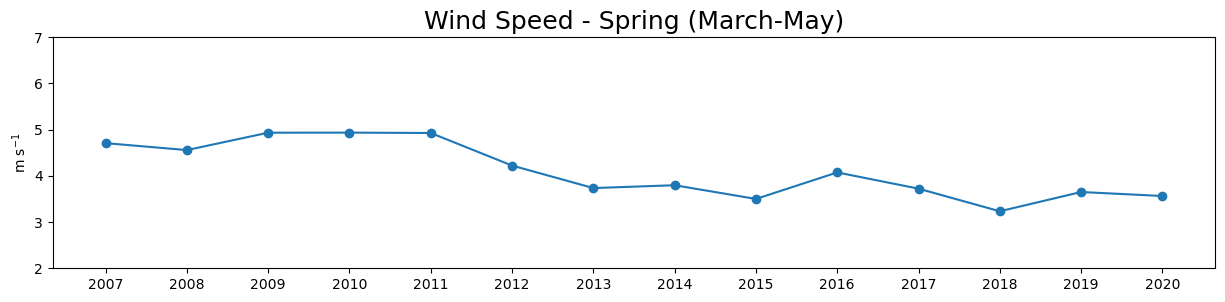

In [126]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Spring2007,Spring2008,Spring2009,Spring2010,Spring2011,Spring2012,Spring2013,Spring2014,Spring2015,Spring2016,Spring2017,Spring2018,Spring2019,Spring2020]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - Spring (March-May)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')


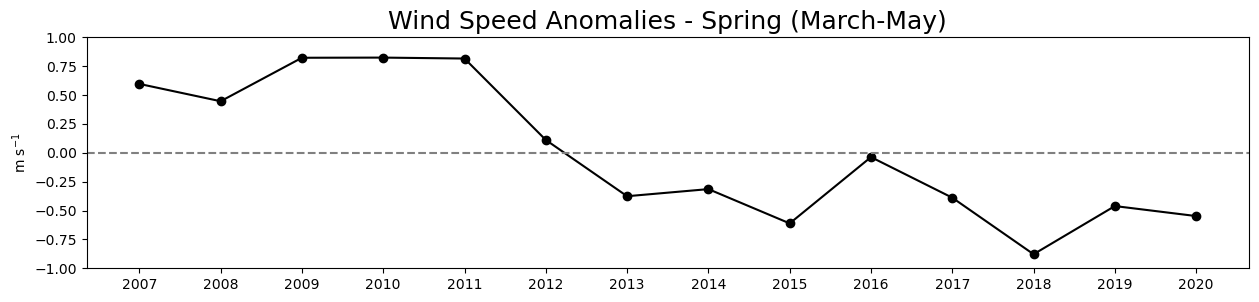

In [127]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Spring2007-SpringClimatology,Spring2008-SpringClimatology,Spring2009-SpringClimatology,\
   Spring2010-SpringClimatology,Spring2011-SpringClimatology,Spring2012-SpringClimatology,\
   Spring2013-SpringClimatology,Spring2014-SpringClimatology,Spring2015-SpringClimatology,\
   Spring2016-SpringClimatology,Spring2017-SpringClimatology,Spring2018-SpringClimatology,\
   Spring2019-SpringClimatology,Spring2020-SpringClimatology]


ax.plot(x, y,marker='o',label='',color='k')
#ax.bar(x,y,color='k')

ax.set_title('Wind Speed Anomalies - Spring (March-May)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-1,1)
ax.set_ylabel('m s$^{-1}$')
ax.axhline(y=0,color='grey',linestyle='--')


In [128]:
Summer2007=(Jun2007+Jul2007+Aug2007)/3
Summer2008=(Jun2008+Jul2008+Aug2008)/3
Summer2009=(Jun2009+Jul2009+Aug2009)/3
Summer2010=(Jun2010+Jul2010+Aug2010)/3
Summer2011=(Jun2011+Jul2011+Aug2011)/3
Summer2012=(Jun2012+Jul2012+Aug2012)/3
Summer2013=(Jun2013+Jul2013+Aug2013)/3
Summer2014=(Jun2014+Jul2014+Aug2014)/3
Summer2015=(Jun2015+Jul2015+Aug2015)/3
Summer2016=(Jun2016+Jul2016+Aug2016)/3
Summer2017=(Jun2017+Jul2017+Aug2017)/3
Summer2018=(Jun2018+Jul2018+Aug2018)/3
Summer2019=(Jun2019+Jul2019+Aug2019)/3
Summer2020=(Jun2020+Jul2020+Aug2020)/3

In [129]:
SummerClimatology=(Summer2007+Summer2008+Summer2009+Summer2010+Summer2011+Summer2012+Summer2013+Summer2014+Summer2015+\
                  Summer2016+Summer2017+Summer2018+Summer2019+Summer2020)/14

Text(0, 0.5, 'm s$^{-1}$')

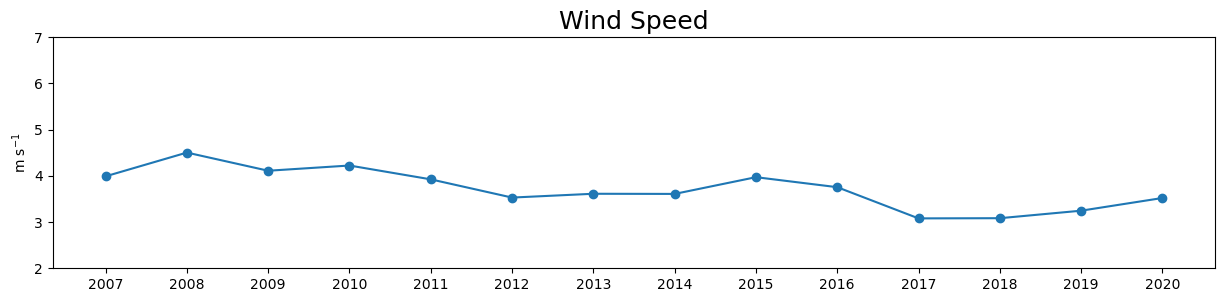

In [130]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Summer2007,Summer2008,Summer2009,Summer2010,Summer2011,Summer2012,Summer2013,Summer2014,Summer2015,Summer2016,Summer2017,Summer2018,Summer2019,Summer2020]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')


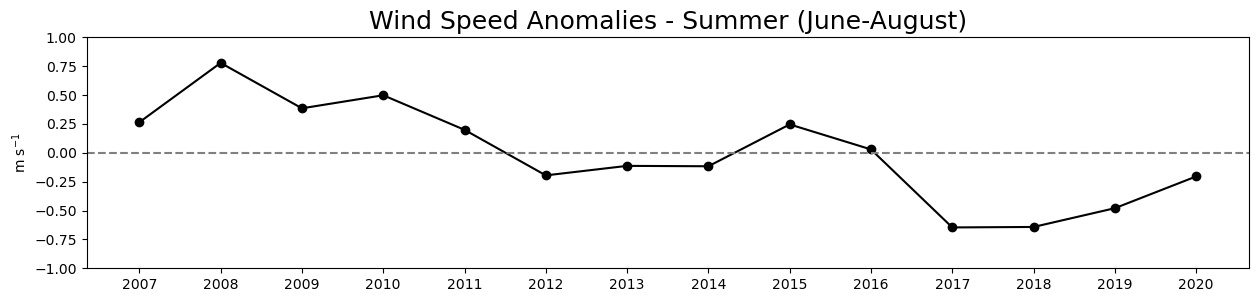

In [131]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Summer2007-SummerClimatology,Summer2008-SummerClimatology,Summer2009-SummerClimatology,\
   Summer2010-SummerClimatology,Summer2011-SummerClimatology,Summer2012-SummerClimatology,\
   Summer2013-SummerClimatology,Summer2014-SummerClimatology,Summer2015-SummerClimatology,\
   Summer2016-SummerClimatology,Summer2017-SummerClimatology,Summer2018-SummerClimatology,\
   Summer2019-SummerClimatology,Summer2020-SummerClimatology]


ax.plot(x, y,marker='o',label='',color='k')
#ax.bar(x,y,color='k')

ax.set_title('Wind Speed Anomalies - Summer (June-August)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-1,1)
ax.set_ylabel('m s$^{-1}$')
ax.axhline(y=0,color='grey',linestyle='--')


In [132]:
SprSummer2007=(Mar2007+Apr2007+May2007+Jun2007+Jul2007+Aug2007)/6
SprSummer2008=(Mar2008+Apr2008+May2008+Jun2008+Jul2008+Aug2008)/6
SprSummer2009=(Mar2009+Apr2009+May2009+Jun2009+Jul2009+Aug2009)/6
SprSummer2010=(Mar2010+Apr2010+May2010+Jun2010+Jul2010+Aug2010)/6
SprSummer2011=(Mar2011+Apr2011+May2011+Jun2011+Jul2011+Aug2011)/6
SprSummer2012=(Mar2012+Apr2012+May2012+Jun2012+Jul2012+Aug2012)/6
SprSummer2013=(Mar2013+Apr2013+May2013+Jun2013+Jul2013+Aug2013)/6
SprSummer2014=(Mar2014+Apr2014+May2014+Jun2014+Jul2014+Aug2014)/6
SprSummer2015=(Mar2015+Apr2015+May2015+Jun2015+Jul2015+Aug2015)/6
SprSummer2016=(Mar2016+Apr2016+May2016+Jun2016+Jul2016+Aug2016)/6
SprSummer2017=(Mar2017+Apr2017+May2017+Jun2017+Jul2017+Aug2017)/6
SprSummer2018=(Mar2018+Apr2018+May2018+Jun2018+Jul2018+Aug2018)/6
SprSummer2019=(Mar2019+Apr2019+May2019+Jun2019+Jul2019+Aug2019)/6
SprSummer2020=(Mar2020+Apr2020+May2020+Jun2020+Jul2020+Aug2020)/6

In [133]:
SprSummerClimatology=(SprSummer2007+SprSummer2008+SprSummer2009+SprSummer2010+SprSummer2011+SprSummer2012+SprSummer2013+SprSummer2014+SprSummer2015+\
                  SprSummer2016+SprSummer2017+SprSummer2018+SprSummer2019+SprSummer2020)/14

Text(0, 0.5, 'm s$^{-1}$')

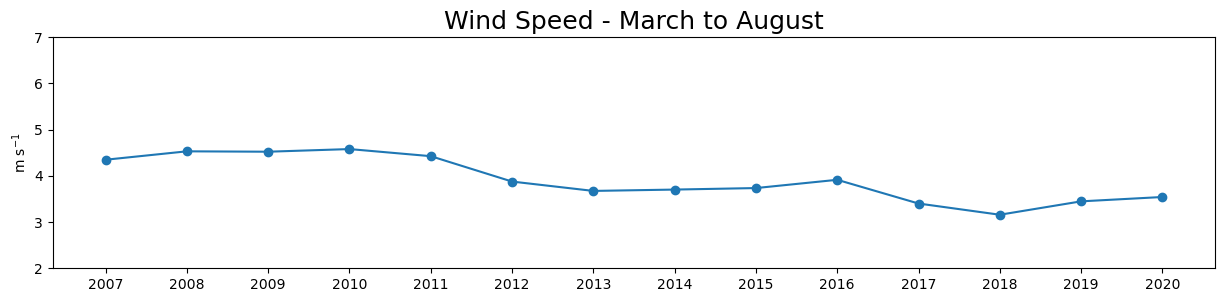

In [134]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[SprSummer2007,SprSummer2008,SprSummer2009,SprSummer2010,SprSummer2011,SprSummer2012,SprSummer2013,SprSummer2014,SprSummer2015,SprSummer2016,SprSummer2017,SprSummer2018,SprSummer2019,SprSummer2020]


ax.plot(x, y,marker='o',label='')

ax.set_title('Wind Speed - March to August',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')


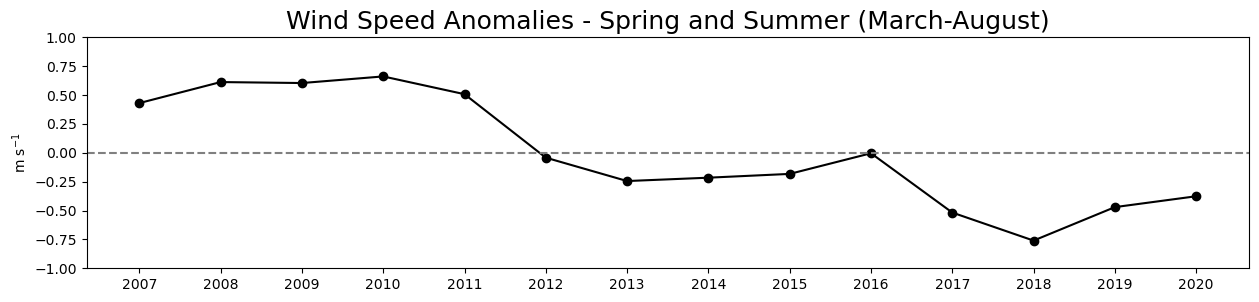

In [135]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[SprSummer2007-SprSummerClimatology,SprSummer2008-SprSummerClimatology,SprSummer2009-SprSummerClimatology,\
   SprSummer2010-SprSummerClimatology,SprSummer2011-SprSummerClimatology,SprSummer2012-SprSummerClimatology,\
   SprSummer2013-SprSummerClimatology,SprSummer2014-SprSummerClimatology,SprSummer2015-SprSummerClimatology,\
   SprSummer2016-SprSummerClimatology,SprSummer2017-SprSummerClimatology,SprSummer2018-SprSummerClimatology,\
   SprSummer2019-SprSummerClimatology,SprSummer2020-SprSummerClimatology]


ax.plot(x, y,marker='o',label='',color='k')
#ax.bar(x,y,color='k')

ax.set_title('Wind Speed Anomalies - Spring and Summer (March-August)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-1,1)
ax.set_ylabel('m s$^{-1}$')
ax.axhline(y=0,color='grey',linestyle='--')


In [136]:
Annual2007=(Feb2007+Mar2007+Apr2007+May2007+Jun2007+Jul2007+Aug2007+Sep2007+Oct2007+Nov2007+Dec2007)/11
Annual2008=(Jan2008+Feb2008+Mar2008+Apr2008+May2008+Jun2008+Jul2008+Aug2008+Sep2008+Oct2008+Nov2008+Dec2008)/12
Annual2009=(Jan2009+Feb2009+Mar2009+Apr2009+May2009+Jun2009+Jul2009+Aug2009+Sep2009+Oct2009+Nov2009+Dec2009)/12
Annual2010=(Jan2010+Feb2010+Mar2010+Apr2010+May2010+Jun2010+Jul2010+Aug2010+Sep2010+Oct2010+Nov2010+Dec2010)/12
Annual2011=(Jan2011+Feb2011+Mar2011+Apr2011+May2011+Jun2011+Jul2011+Aug2011+Sep2011+Oct2011+Nov2011+Dec2011)/12
Annual2012=(Jan2012+Feb2012+Mar2012+Apr2012+May2012+Jun2012+Jul2012+Aug2012+Sep2012+Oct2012+Nov2012+Dec2012)/12
Annual2013=(Jan2013+Feb2013+Mar2013+Apr2013+May2013+Jun2013+Jul2013+Aug2013+Sep2013+Oct2013+Nov2013+Dec2013)/12
Annual2014=(Jan2014+Feb2014+Mar2014+Apr2014+May2014+Jun2014+Jul2014+Aug2014+Sep2014+Oct2014+Nov2014)/11
Annual2015=(Jan2015+Feb2015+Mar2015+Apr2015+May2015+Jun2015+Jul2015+Aug2015+Sep2015+Oct2015+Nov2015+Dec2015)/12
Annual2016=(Jan2016+Feb2016+Mar2016+Apr2016+May2016+Jun2016+Jul2016+Aug2016+Sep2016+Oct2016+Nov2016+Dec2016)/12
Annual2017=(Jan2017+Feb2017+Mar2017+Apr2017+May2017+Jun2017+Jul2017+Aug2017+Sep2017+Oct2017+Nov2017+Dec2017)/12
Annual2018=(Jan2018+Feb2018+Mar2018+Apr2018+May2018+Jun2018+Jul2018+Aug2018+Sep2018+Oct2018+Nov2018+Dec2018)/12
Annual2019=(Jan2019+Feb2019+Mar2019+Apr2019+May2019+Jun2019+Jul2019+Aug2019+Sep2019+Oct2019+Nov2019+Dec2019)/12
Annual2020=(Jan2020+Feb2020+Mar2020+Apr2020+May2020+Jun2020+Jul2020+Aug2020+Sep2020+Oct2020+Nov2020+Dec2020)/12

In [137]:
AnnualClimatology=(Annual2007+Annual2008+Annual2009+Annual2010+Annual2011+Annual2012+Annual2013+Annual2014+Annual2015+\
                  Annual2016+Annual2017+Annual2018+Annual2019+Annual2020)/14

Text(0, 0.5, 'm s$^{-1}$')

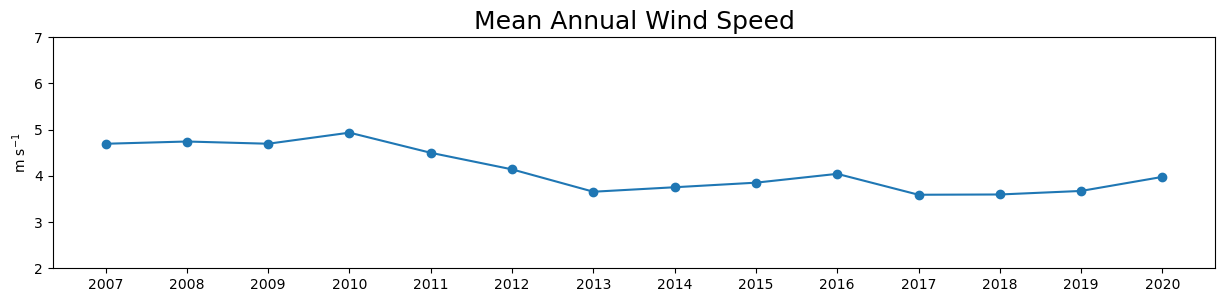

In [138]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Annual2007,Annual2008,Annual2009,Annual2010,Annual2011,Annual2012,Annual2013,Annual2014,Annual2015,Annual2016,Annual2017,Annual2018,Annual2019,Annual2020]


ax.plot(x, y,marker='o',label='')

ax.set_title('Mean Annual Wind Speed',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(2,7)
ax.set_ylabel('m s$^{-1}$')


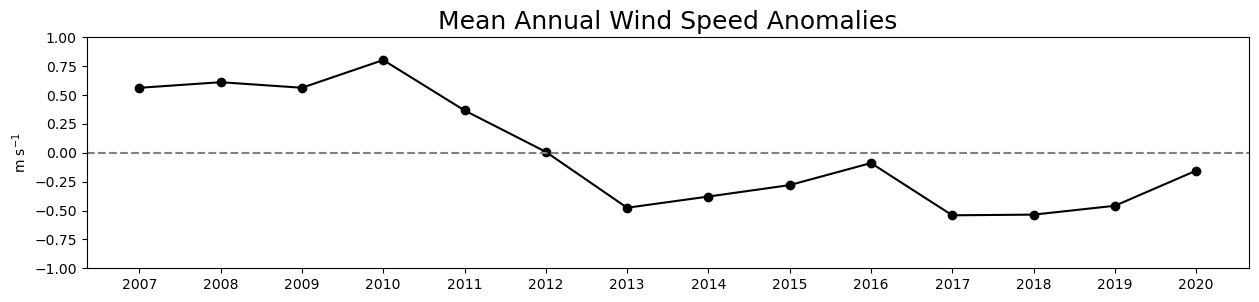

In [139]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
y=[Annual2007-AnnualClimatology,Annual2008-AnnualClimatology,Annual2009-AnnualClimatology,\
Annual2010-AnnualClimatology,Annual2011-AnnualClimatology,Annual2012-AnnualClimatology,\
Annual2013-AnnualClimatology,Annual2014-AnnualClimatology,Annual2015-AnnualClimatology,\
Annual2016-AnnualClimatology,Annual2017-AnnualClimatology,Annual2018-AnnualClimatology,\
Annual2019-AnnualClimatology,Annual2020-AnnualClimatology]


ax.plot(x, y,marker='o',label='',color='k')
#ax.bar(x,y,color='k')

ax.set_title('Mean Annual Wind Speed Anomalies',fontsize=18)  #(with 2015)
ax.legend((),frameon=False)
ax.set_ylim(-1,1)
ax.set_ylabel('m s$^{-1}$')
ax.axhline(y=0,color='grey',linestyle='--')


In [140]:
print(Annual2007-AnnualClimatology,Annual2008-AnnualClimatology,Annual2009-AnnualClimatology,\
Annual2010-AnnualClimatology,Annual2011-AnnualClimatology,Annual2012-AnnualClimatology,\
Annual2013-AnnualClimatology,Annual2014-AnnualClimatology,Annual2015-AnnualClimatology,\
Annual2016-AnnualClimatology,Annual2017-AnnualClimatology,Annual2018-AnnualClimatology,\
Annual2019-AnnualClimatology,Annual2020-AnnualClimatology)

0.5624350840911205 0.611054585609601 0.5629420342383451 0.8028133772152328 0.3667445244727201 0.008051083717511176 -0.47596692419671394 -0.3788445873177926 -0.27978753424310066 -0.08895952877028179 -0.5413632330956397 -0.5355524954857764 -0.4589110948306656 -0.1546552914045587


In [141]:
print(Jan_C,Feb_C, Mar_C, Apr_C,May_C,\
      Jun_C, Jul_C,Aug_C,Sep_C,Oct_C,\
     Nov_C,Dec_C)

5.255556106567383 4.943120002746582 5.280871868133545 4.541804313659668 4.1618571281433105 4.005492687225342 4.127147674560547 4.005497932434082 4.025290012359619 4.468635082244873 5.065437316894531 5.1902337074279785


In [142]:
print(Jan_W,Feb_W, Mar_W, Apr_W,May_W,\
      Jun_W,Jul_W,Aug_W,Sep_W,Oct_W,\
     Nov_W,Dec_W)

4.4879350662231445 4.2724103927612305 3.360086679458618 3.922926187515259 3.1792898178100586 3.588247537612915 3.384995937347412 3.394467830657959 3.5997471809387207 3.6979005336761475 4.087904453277588 4.875214576721191


In [143]:
print(Spring2007-SpringClimatology,Spring2008-SpringClimatology,Spring2009-SpringClimatology,\
Spring2010-SpringClimatology,Spring2011-SpringClimatology,Spring2012-SpringClimatology,\
Spring2013-SpringClimatology,Spring2014-SpringClimatology,Spring2015-SpringClimatology,\
Spring2016-SpringClimatology,Spring2017-SpringClimatology,Spring2018-SpringClimatology,\
Spring2019-SpringClimatology,Spring2020-SpringClimatology)

0.5962711061750134 0.44618565695626344 0.8226778393700007 0.824073700677781 0.8159735089256648 0.11096754528227315 -0.37610380990164627 -0.31457846505301346 -0.6114057813371931 -0.037362825302850844 -0.38899716876802026 -0.8784479413713728 -0.4613340014503118 -0.5479193642025906


In [144]:
print(Summer2007-SummerClimatology,Summer2008-SummerClimatology,Summer2009-SummerClimatology,\
Summer2010-SummerClimatology,Summer2011-SummerClimatology,Summer2012-SummerClimatology,\
Summer2013-SummerClimatology,Summer2014-SummerClimatology,Summer2015-SummerClimatology,\
Summer2016-SummerClimatology,Summer2017-SummerClimatology,Summer2018-SummerClimatology,\
Summer2019-SummerClimatology,Summer2020-SummerClimatology)

0.2642326809111091 0.7782599585396897 0.3850447790963303 0.49798334212530193 0.19870889754522336 -0.19564147222609796 -0.11334573654901492 -0.11672174362909304 0.24562426975795137 0.029069945925757512 -0.6463317416963128 -0.6422366641816644 -0.47972420283726347 -0.20492231278192508
